# QUESTION 1

In [ ]:
pip install libsvm-official

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for libsvm-official: filename=libsvm_official-3.31.0-cp39-cp39-linux_x86_64.whl size=125904 sha256=74d9b51d7bf727cd8f85e13616fd65c7330af5035374083aafac3f175b71eeba
  Stored in directory: /root/.cache/pip/wheels/1b/a9/b4/fb374019f74d51e7744b8e1e95d693c449ec79674cf720c1a3
Successfully built libsvm-official


In [ ]:
import numpy as np
import math
from libsvm.svmutil import *

## Importing Dataset

In [ ]:
#below where the file is in gdrive, change with your
data_path = "/content/drive/MyDrive/Colab Notebooks/PRNN_A1/Prnn_datasets/"
train_dataset = np.loadtxt(data_path + 'p3_train.csv', delimiter=',')
test_dataset = np.loadtxt(data_path + 'p3_test.csv', delimiter=',')

In [ ]:
# Creating base training and testing dataset
X_train_base = train_dataset[:,:10]
Y_train_base = train_dataset[:,10]
X_test_base = test_dataset[:,:10]
Y_test_base = test_dataset[:,10]

## Applying on Classification Problem 1

### Kernel 1 (Gaussian)

#### Grid Search

Finding best params through grid search on small set of training and validation test

In [ ]:
X_train_1= X_train_base[0:20000,:]
Y_train_1 = Y_train_base[0:20000]
X_val_1 = X_train_base[20000:40000,:]
Y_val_1 = Y_train_base[20000:40000]

In [ ]:
grid = np.zeros((10,10))
for c in range(1,11):  #can change into steps of 10
  for g in range(1,11):
    gm = 1/g
    st =  '-t 2 -c ' + str(c) + ' -g ' + str(np.round(gm,2)) +' -e 1'
    model = svm_train(Y_train_1, X_train_1, st)
    # with open('/dev/null', 'w') as null_stream:
    #   with contextlib.redirect_stdout(null_stream):
    p_label, p_acc, p_val = svm_predict(Y_val_1, X_val_1,model)
    grid[c-1][g-1]=p_acc[0]

Accuracy = 49.43% (9886/20000) (classification)
Accuracy = 56.19% (11238/20000) (classification)
Accuracy = 56.805% (11361/20000) (classification)
Accuracy = 57.28% (11456/20000) (classification)
Accuracy = 57.425% (11485/20000) (classification)
Accuracy = 57.745% (11549/20000) (classification)
Accuracy = 57.745% (11549/20000) (classification)
Accuracy = 57.99% (11598/20000) (classification)
Accuracy = 57.995% (11599/20000) (classification)
Accuracy = 58.16% (11632/20000) (classification)
Accuracy = 49.885% (9977/20000) (classification)
Accuracy = 54.13% (10826/20000) (classification)
Accuracy = 54.78% (10956/20000) (classification)
Accuracy = 55.585% (11117/20000) (classification)
Accuracy = 56.135% (11227/20000) (classification)
Accuracy = 56.41% (11282/20000) (classification)
Accuracy = 56.9% (11380/20000) (classification)
Accuracy = 57.415% (11483/20000) (classification)
Accuracy = 57.395% (11479/20000) (classification)
Accuracy = 57.545% (11509/20000) (classification)
Accuracy = 4

In [ ]:
np.round(grid,1)

array([[49.4, 56.2, 56.8, 57.3, 57.4, 57.7, 57.7, 58. , 58. , 58.2],
       [49.9, 54.1, 54.8, 55.6, 56.1, 56.4, 56.9, 57.4, 57.4, 57.5],
       [50. , 53.5, 53.5, 54.1, 54.7, 55.3, 56.1, 56.7, 56.8, 57. ],
       [50. , 53.2, 52.7, 53. , 53.9, 54.6, 55.4, 56.1, 56.2, 56.6],
       [49.9, 53.3, 52. , 52. , 52.9, 53.7, 54.8, 55.7, 56.2, 56.3],
       [49.9, 53.2, 51.9, 51.8, 52.3, 53.1, 54.1, 55.1, 55.4, 55.9],
       [49.9, 53.3, 51.5, 51.3, 51.9, 52.7, 53.6, 54.6, 55.2, 55.5],
       [49.9, 53.2, 51.3, 50.8, 51.2, 52.2, 53.3, 54.3, 54.5, 55.1],
       [49.9, 53.3, 51.2, 50.5, 51.1, 51.7, 53.2, 53.8, 54.4, 55. ],
       [49.9, 53.3, 51.2, 50.7, 50.6, 51.4, 52.6, 53.5, 54.1, 54.5]])

In [ ]:
np.max(grid)

58.160000000000004

#### Training and testing ONE VS ALL


Using the best params

In [ ]:
# Training models for classifying
m=[]
for i in range(1,6):
  X_train = X_train_base[np.where(Y_train_base[:]==i)]
  Y_train = np.ones((X_train.shape[0],1))
  x_temp = X_train_base[np.where(Y_train_base[:]!=i)]
  y_temp = -1*np.ones((x_temp.shape[0],1))
  X_train = np.row_stack((X_train[:,:],x_temp[:]))
  Y_train = np.row_stack((Y_train[:,:],y_temp[:]))
  Y_train = Y_train.reshape((Y_train.shape[0],))
  m.append(svm_train(Y_train, X_train, '-t 2 -c 1 -g 0.1 -e 1'))

In [ ]:
import contextlib
# This is required to supress the print statement popping in the svm model

In [ ]:
count = 0
for i in range(X_test_base.shape[0]):
  l = []
  for j in range(5):
    with open('/dev/null', 'w') as null_stream:
      with contextlib.redirect_stdout(null_stream):
        p_label, p_acc, p_val = svm_predict([Y_test_base[i]],[X_test_base[i]],m[j])
    l.append(p_val[0][0])
  k = np.argmax(l)
  if(k+1==int(Y_test_base[i])):
    count+=1

In [ ]:
count/X_test_base.shape[0] #Accuracy

0.5673333333333334

In [ ]:
Y_test_base.max()

5.0

#### Training and testing MULTI CLASS SVM

Using the best params

In [ ]:
model = svm_train(Y_train_base, X_train_base, '-t 2 -c 1 -g 0.1  -e 1')

In [ ]:
p_label, p_acc, p_val = svm_predict(Y_test_base, X_test_base,model)

Accuracy = 58.9467% (8842/15000) (classification)


#### Without slack

In [ ]:
m=[]
for i in range(1,6):
  X_train = X_train_base[np.where(Y_train_base[:]==i)]
  Y_train = np.ones((X_train.shape[0],1))
  x_temp = X_train_base[np.where(Y_train_base[:]!=i)]
  y_temp = -1*np.ones((x_temp.shape[0],1))
  X_train = np.row_stack((X_train[:,:],x_temp[:]))
  Y_train = np.row_stack((Y_train[:,:],y_temp[:]))
  Y_train = Y_train.reshape((Y_train.shape[0],))
  m.append(svm_train(Y_train, X_train, '-t 2 -c 100 -g 0.1 -e 1'))

In [ ]:
import contextlib


In [ ]:
count = 0
for i in range(X_test_base.shape[0]):
  l = []
  for j in range(5):
    with open('/dev/null', 'w') as null_stream:
      with contextlib.redirect_stdout(null_stream):
        p_label, p_acc, p_val = svm_predict([Y_test_base[i]],[X_test_base[i]],m[j])
    l.append(p_val[0][0])
  k = np.argmax(l)
  if(k+1==int(Y_test_base[i])):
    count+=1

In [ ]:
count/X_test_base.shape[0]

0.5166666666666667

In [ ]:
type(np.inf)

float

In [ ]:
f = np.inf
model = svm_train(Y_train_1, X_train_1, '-t 2 -c ' + str(f) +' -g 0.1  -e 1')

In [ ]:
p_label, p_acc, p_val = svm_predict(Y_test_base, X_test_base,model)

Accuracy = 44.8733% (6731/15000) (classification)


### Kernel 2 (Polynomial)

#### Grid Search

Finding best params through grid search on small set

In [ ]:
X_train_1= X_train_base[0:20000,:]
Y_train_1 = Y_train_base[0:20000]
X_val_1 = X_train_base[20000:40000,:]
Y_val_1 = Y_train_base[20000:40000]

In [ ]:
grid = np.zeros((10,5))
for c in range(1,11):
  for d in range(1,6):
    st =  '-t 1 -c ' + str(c) + ' -d ' + str(d) +' -e 1'
    model = svm_train(Y_train_1, X_train_1, st)
    # with open('/dev/null', 'w') as null_stream:
    #   with contextlib.redirect_stdout(null_stream):
    p_label, p_acc, p_val = svm_predict(Y_val_1, X_val_1,model)
    grid[c-1][d-1]=p_acc[0]

Accuracy = 55.915% (11183/20000) (classification)
Accuracy = 51.985% (10397/20000) (classification)
Accuracy = 56.53% (11306/20000) (classification)
Accuracy = 48.53% (9706/20000) (classification)
Accuracy = 50.22% (10044/20000) (classification)
Accuracy = 55.93% (11186/20000) (classification)
Accuracy = 52.02% (10404/20000) (classification)
Accuracy = 56.43% (11286/20000) (classification)
Accuracy = 48.115% (9623/20000) (classification)
Accuracy = 48.96% (9792/20000) (classification)
Accuracy = 55.875% (11175/20000) (classification)
Accuracy = 51.94% (10388/20000) (classification)
Accuracy = 56.34% (11268/20000) (classification)
Accuracy = 47.93% (9586/20000) (classification)
Accuracy = 48.485% (9697/20000) (classification)
Accuracy = 55.86% (11172/20000) (classification)
Accuracy = 51.95% (10390/20000) (classification)
Accuracy = 56.285% (11257/20000) (classification)
Accuracy = 48.07% (9614/20000) (classification)
Accuracy = 47.8% (9560/20000) (classification)
Accuracy = 55.96% (111

In [ ]:
np.round(grid,1)

array([[55.9, 52. , 56.5, 48.5, 50.2],
       [55.9, 52. , 56.4, 48.1, 49. ],
       [55.9, 51.9, 56.3, 47.9, 48.5],
       [55.9, 52. , 56.3, 48.1, 47.8],
       [56. , 52. , 56.4, 47.9, 47.2],
       [55.9, 52. , 56.3, 47.6, 47.2],
       [55.9, 52. , 56.2, 47.7, 47.1],
       [55.8, 52. , 56.2, 47.9, 46.8],
       [55.9, 51.9, 56.3, 47.7, 46.5],
       [55.7, 51.9, 56.2, 47.8, 46.4]])

#### Training and testing ONE VS ALL


Using the best params

In [ ]:
m=[]
for i in range(1,6):
  X_train = X_train_base[np.where(Y_train_base[:]==i)]
  Y_train = np.ones((X_train.shape[0],1))
  x_temp = X_train_base[np.where(Y_train_base[:]!=i)]
  y_temp = -1*np.ones((x_temp.shape[0],1))
  X_train = np.row_stack((X_train[:,:],x_temp[:]))
  Y_train = np.row_stack((Y_train[:,:],y_temp[:]))
  Y_train = Y_train.reshape((Y_train.shape[0],))
  m.append(svm_train(Y_train, X_train, '-t 1 -c 5 -d 3  -e 1'))

In [ ]:
import contextlib


In [ ]:
count = 0
for i in range(X_test_base.shape[0]):
  l = []
  for j in range(5):
    with open('/dev/null', 'w') as null_stream:
      with contextlib.redirect_stdout(null_stream):
        p_label, p_acc, p_val = svm_predict([Y_test_base[i]],[X_test_base[i]],m[j])
    l.append(p_val[0][0])
  k = np.argmax(l)
  if(k+1==int(Y_test_base[i])):
    count+=1

In [ ]:
count/X_test_base.shape[0]

0.5740666666666666

#### Training and testing MULTI CLASS SVM

Using the best params

In [ ]:
model = svm_train(Y_train_base, X_train_base, '-t 1 -c 5 -d 3 -e 1')

In [ ]:
p_label, p_acc, p_val = svm_predict(Y_test_base, X_test_base,model)

Accuracy = 57.8533% (8678/15000) (classification)


### Kernel 3(Linear)

Finding best params through grid search on small set

In [ ]:
X_train_1= X_train_base[0:20000,:]
Y_train_1 = Y_train_base[0:20000]
X_val_1 = X_train_base[20000:40000,:]
Y_val_1 = Y_train_base[20000:40000]

In [ ]:
grid = np.zeros((10,1))
for c in range(1,11):  #can change into steps of 10
    st =  '-t 0 -c ' + str(c) + ' -e 1'
    model = svm_train(Y_train_1, X_train_1, st)
    # with open('/dev/null', 'w') as null_stream:
    #   with contextlib.redirect_stdout(null_stream):
    p_label, p_acc, p_val = svm_predict(Y_val_1, X_val_1,model)
    grid[c-1]=p_acc[0]

Accuracy = 55.935% (11187/20000) (classification)
Accuracy = 55.83% (11166/20000) (classification)
Accuracy = 55.865% (11173/20000) (classification)
Accuracy = 55.78% (11156/20000) (classification)
Accuracy = 55.86% (11172/20000) (classification)
Accuracy = 55.845% (11169/20000) (classification)
Accuracy = 55.86% (11172/20000) (classification)
Accuracy = 55.685% (11137/20000) (classification)
Accuracy = 55.975% (11195/20000) (classification)
Accuracy = 55.635% (11127/20000) (classification)


In [ ]:
np.round(grid,1)

array([[55.9],
       [55.8],
       [55.9],
       [55.8],
       [55.9],
       [55.8],
       [55.9],
       [55.7],
       [56. ],
       [55.6]])

#### Training and testing ONE VS ALL


Using the best params

In [ ]:
m=[]
for i in range(1,6):
  X_train = X_train_base[np.where(Y_train_base[:]==i)]
  Y_train = np.ones((X_train.shape[0],1))
  x_temp = X_train_base[np.where(Y_train_base[:]!=i)]
  y_temp = -1*np.ones((x_temp.shape[0],1))
  X_train = np.row_stack((X_train[:,:],x_temp[:]))
  Y_train = np.row_stack((Y_train[:,:],y_temp[:]))
  Y_train = Y_train.reshape((Y_train.shape[0],))
  m.append(svm_train(Y_train, X_train, '-t 0 -c 5 -e 1'))

In [ ]:
import contextlib


In [ ]:
count = 0
for i in range(X_test_base.shape[0]):
  l = []
  for j in range(5):
    with open('/dev/null', 'w') as null_stream:
      with contextlib.redirect_stdout(null_stream):
        p_label, p_acc, p_val = svm_predict([Y_test_base[i]],[X_test_base[i]],m[j])
    l.append(p_val[0][0])
  k = np.argmax(l)
  if(k+1==int(Y_test_base[i])):
    count+=1

In [ ]:
count/X_test_base.shape[0]

0.5688

#### Training and testing MULTI CLASS SVM

Using the best params

In [ ]:
model = svm_train(Y_train_1, X_train_1, '-t 0 -c 1 -e 1')

In [ ]:
p_label, p_acc, p_val = svm_predict(Y_test_base, X_test_base,model)

Accuracy = 56.5067% (8476/15000) (classification)


## Applying on classification problem 2

In [ ]:
#below where the file is in gdrive, change with your
data_path = "/content/drive/MyDrive/Colab Notebooks/PRNN_A1/Prnn_datasets/"
dataset = np.loadtxt(data_path + 'PCA_MNIST.csv', delimiter=',',skiprows=1)

In [ ]:
dataset.shape

(60000, 11)

In [ ]:
# Normalising dataset needed to prevent exponent going to zero
for i in range(1,dataset.shape[1]):
  dataset[:,i] = (dataset[:,i]-dataset[:,i].min())/(dataset[:,i].max()-dataset[:,i].min())

In [ ]:
count = 40000
X_train_base = dataset[0:count,1:]
Y_train_base =dataset[0:count,0]
X_test_base = dataset[count:,1:]
Y_test_base = dataset[count:,0]

### Kernel 1 (Gaussian)

#### Grid Search

Finding best params through grid search on small set

In [ ]:
X_train_1= X_train_base[0:20000,:]
Y_train_1 = Y_train_base[0:20000]
X_val_1 = X_train_base[20000:40000,:]
Y_val_1 = Y_train_base[20000:40000]

In [ ]:
grid = np.zeros((10,10))
for c in range(1,11):  #can change into steps of 10
  for g in range(1,11):
    gm = 1/g
    st =  '-t 2 -c ' + str(c) + ' -g ' + str(np.round(gm,2)) +' -e 1'
    model = svm_train(Y_train_1, X_train_1, st)
    # with open('/dev/null', 'w') as null_stream:
    #   with contextlib.redirect_stdout(null_stream):
    p_label, p_acc, p_val = svm_predict(Y_val_1, X_val_1,model)
    grid[c-1][g-1]=p_acc[0]

Accuracy = 92.18% (18436/20000) (classification)
Accuracy = 91.13% (18226/20000) (classification)
Accuracy = 90.475% (18095/20000) (classification)
Accuracy = 90.125% (18025/20000) (classification)
Accuracy = 89.805% (17961/20000) (classification)
Accuracy = 89.795% (17959/20000) (classification)
Accuracy = 89.535% (17907/20000) (classification)
Accuracy = 89.38% (17876/20000) (classification)
Accuracy = 89.23% (17846/20000) (classification)
Accuracy = 89.005% (17801/20000) (classification)
Accuracy = 92.44% (18488/20000) (classification)
Accuracy = 91.49% (18298/20000) (classification)
Accuracy = 91.085% (18217/20000) (classification)
Accuracy = 90.655% (18131/20000) (classification)
Accuracy = 90.385% (18077/20000) (classification)
Accuracy = 90.07% (18014/20000) (classification)
Accuracy = 89.925% (17985/20000) (classification)
Accuracy = 89.89% (17978/20000) (classification)
Accuracy = 89.755% (17951/20000) (classification)
Accuracy = 89.64% (17928/20000) (classification)
Accuracy 

In [ ]:
np.round(grid,1)

array([[92.2, 91.1, 90.5, 90.1, 89.8, 89.8, 89.5, 89.4, 89.2, 89. ],
       [92.4, 91.5, 91.1, 90.7, 90.4, 90.1, 89.9, 89.9, 89.8, 89.6],
       [92.8, 91.7, 91.3, 90.8, 90.7, 90.3, 90.1, 89.9, 90. , 89.9],
       [92.9, 91.7, 91.4, 91. , 90.9, 90.6, 90.6, 90.3, 90. , 89.9],
       [92.9, 92. , 91.5, 91.1, 90.8, 90.9, 90.6, 90.4, 90.2, 90.1],
       [92.7, 92.1, 91.7, 91.2, 91.1, 90.9, 90.7, 90.4, 90.3, 90.2],
       [93. , 92.5, 91.7, 91.2, 91. , 90.6, 90.9, 90.5, 90.6, 90.4],
       [93.1, 92.3, 91.7, 91.5, 91.1, 91.1, 90.6, 90.6, 90.5, 90.4],
       [93.1, 92.5, 91.9, 91.5, 91.2, 91. , 90.7, 90.7, 90.7, 90.4],
       [93.3, 92.3, 91.7, 91.5, 91. , 91.1, 91. , 90.7, 90.5, 90.5]])

In [ ]:
np.max(grid)

#### Training and testing ONE VS ALL


Using the best params

In [ ]:
m=[]
for i in range(0,10):
  X_train = X_train_base[np.where(Y_train_base[:]==i)]
  #print(X_train.shape)
  Y_train = np.ones((X_train.shape[0],1))
  x_temp = X_train_base[np.where(Y_train_base[:]!=i)]
  y_temp = -1*np.ones((x_temp.shape[0],1))
  X_train = np.row_stack((X_train[:,:],x_temp[:]))
  Y_train = np.row_stack((Y_train[:,:],y_temp[:]))
  Y_train = Y_train.reshape((Y_train.shape[0],))
  m.append(svm_train(Y_train, X_train, '-t 2 -c 1 -g 0.1 -e 0.001'))

In [ ]:
import contextlib


In [ ]:
count = 0
for i in range(X_test_base.shape[0]):
  l = []
  for j in range(10):
    with open('/dev/null', 'w') as null_stream:
      with contextlib.redirect_stdout(null_stream):
        p_label, p_acc, p_val = svm_predict([Y_test_base[i]],[X_test_base[i]],m[j])
    l.append(p_val[0][0])
  k = np.argmax(l)
  if(k==int(Y_test_base[i])):
    count+=1

In [ ]:
count*100/X_test_base.shape[0]

91.145

In [ ]:
Y_test_base.max()

9.0

#### Training and testing MULTI CLASS SVM

Using the best params

In [ ]:
model = svm_train(Y_train_base, X_train_base, '-t 2 -c 10 -g 0.1  -e 1')

In [ ]:
p_label, p_acc, p_val = svm_predict(Y_test_base, X_test_base,model)

Accuracy = 94.635% (18927/20000) (classification)


### Kernel 2 (Polynomial)

#### Grid Search

Finding best params through grid search on small set

In [ ]:
X_train_1= X_train_base[0:20000,:]
Y_train_1 = Y_train_base[0:20000]
X_val_1 = X_train_base[20000:40000,:]
Y_val_1 = Y_train_base[20000:40000]

In [ ]:
grid = np.zeros((10,5))
for c in range(1,11):
  for d in range(1,6):
    st =  '-t 1 -c ' + str(c) + ' -d ' + str(d) +' -e 1'
    model = svm_train(Y_train_1, X_train_1, st)
    # with open('/dev/null', 'w') as null_stream:
    #   with contextlib.redirect_stdout(null_stream):
    p_label, p_acc, p_val = svm_predict(Y_val_1, X_val_1,model)
    grid[c-1][d-1]=p_acc[0]

Accuracy = 88.26% (17652/20000) (classification)
Accuracy = 87.085% (17417/20000) (classification)
Accuracy = 83.625% (16725/20000) (classification)
Accuracy = 74.88% (14976/20000) (classification)
Accuracy = 44.745% (8949/20000) (classification)
Accuracy = 88.835% (17767/20000) (classification)
Accuracy = 88.15% (17630/20000) (classification)
Accuracy = 85.425% (17085/20000) (classification)
Accuracy = 80.275% (16055/20000) (classification)
Accuracy = 58.455% (11691/20000) (classification)
Accuracy = 89.03% (17806/20000) (classification)
Accuracy = 88.535% (17707/20000) (classification)
Accuracy = 86.2% (17240/20000) (classification)
Accuracy = 81.9% (16380/20000) (classification)
Accuracy = 68.46% (13692/20000) (classification)
Accuracy = 89.34% (17868/20000) (classification)
Accuracy = 89.065% (17813/20000) (classification)
Accuracy = 87.01% (17402/20000) (classification)
Accuracy = 83.11% (16622/20000) (classification)
Accuracy = 73.05% (14610/20000) (classification)
Accuracy = 89.

In [ ]:
np.round(grid,1)

array([[88.3, 87.1, 83.6, 74.9, 44.7],
       [88.8, 88.1, 85.4, 80.3, 58.5],
       [89. , 88.5, 86.2, 81.9, 68.5],
       [89.3, 89.1, 87. , 83.1, 73. ],
       [89.4, 89.2, 87.3, 83.6, 75.2],
       [89.6, 89.6, 87.7, 84.2, 76.1],
       [89.5, 89.7, 87.8, 84.6, 77.5],
       [89.3, 89.8, 88.3, 85. , 78. ],
       [89.5, 89.9, 88.5, 85.1, 79.1],
       [89.5, 90.1, 88.6, 85.3, 79.9]])

#### Training and testing ONE VS ALL


Using the best params

In [ ]:
m=[]
for i in range(10):
  X_train = X_train_base[np.where(Y_train_base[:]==i)]
  Y_train = np.ones((X_train.shape[0],1))
  x_temp = X_train_base[np.where(Y_train_base[:]!=i)]
  y_temp = -1*np.ones((x_temp.shape[0],1))
  X_train = np.row_stack((X_train[:,:],x_temp[:]))
  Y_train = np.row_stack((Y_train[:,:],y_temp[:]))
  Y_train = Y_train.reshape((Y_train.shape[0],))
  m.append(svm_train(Y_train, X_train, '-t 1 -c 10 -d 2  -e 1'))

In [ ]:
import contextlib


In [ ]:
count = 0
for i in range(X_test_base.shape[0]):
  l = []
  for j in range(10):
    with open('/dev/null', 'w') as null_stream:
      with contextlib.redirect_stdout(null_stream):
        p_label, p_acc, p_val = svm_predict([Y_test_base[i]],[X_test_base[i]],m[j])
    l.append(p_val[0][0])
  k = np.argmax(l)
  if(k==int(Y_test_base[i])):
    count+=1

In [ ]:
count/X_test_base.shape[0]

0.92465

#### Training and testing MULTI CLASS SVM

Using the best params

In [ ]:
model = svm_train(Y_train_base, X_train_base, '-t 1 -c 10 -d 2 -e 1')

In [ ]:
p_label, p_acc, p_val = svm_predict(Y_test_base, X_test_base,model)

Accuracy = 94.165% (18833/20000) (classification)


### Kernel 3(Linear)

Finding best params through grid search on small set

In [ ]:
X_train_1= X_train_base[0:20000,:]
Y_train_1 = Y_train_base[0:20000]
X_val_1 = X_train_base[20000:40000,:]
Y_val_1 = Y_train_base[20000:40000]

In [ ]:
grid = np.zeros((10,1))
for c in range(1,11):  #can change into steps of 10
    st =  '-t 0 -c ' + str(c) + ' -e 1'
    model = svm_train(Y_train_1, X_train_1, st)
    # with open('/dev/null', 'w') as null_stream:
    #   with contextlib.redirect_stdout(null_stream):
    p_label, p_acc, p_val = svm_predict(Y_val_1, X_val_1,model)
    grid[c-1]=p_acc[0]

Accuracy = 89.49% (17898/20000) (classification)
Accuracy = 89.655% (17931/20000) (classification)
Accuracy = 89.635% (17927/20000) (classification)
Accuracy = 89.82% (17964/20000) (classification)
Accuracy = 89.835% (17967/20000) (classification)
Accuracy = 89.825% (17965/20000) (classification)
Accuracy = 90.01% (18002/20000) (classification)
Accuracy = 89.965% (17993/20000) (classification)
Accuracy = 89.75% (17950/20000) (classification)
Accuracy = 89.835% (17967/20000) (classification)


In [ ]:
np.round(grid,1)

array([[89.5],
       [89.7],
       [89.6],
       [89.8],
       [89.8],
       [89.8],
       [90. ],
       [90. ],
       [89.8],
       [89.8]])

#### Training and testing ONE VS ALL


Using the best params

In [ ]:
m=[]
for i in range(10):
  X_train = X_train_base[np.where(Y_train_base[:]==i)]
  Y_train = np.ones((X_train.shape[0],1))
  x_temp = X_train_base[np.where(Y_train_base[:]!=i)]
  y_temp = -1*np.ones((x_temp.shape[0],1))
  X_train = np.row_stack((X_train[:,:],x_temp[:]))
  Y_train = np.row_stack((Y_train[:,:],y_temp[:]))
  Y_train = Y_train.reshape((Y_train.shape[0],))
  m.append(svm_train(Y_train, X_train, '-t 0 -c 7 -e 1'))

In [ ]:
import contextlib


In [ ]:
count = 0
for i in range(X_test_base.shape[0]):
  l = []
  for j in range(10):
    with open('/dev/null', 'w') as null_stream:
      with contextlib.redirect_stdout(null_stream):
        p_label, p_acc, p_val = svm_predict([Y_test_base[i]],[X_test_base[i]],m[j])
    l.append(p_val[0][0])
  k = np.argmax(l)
  if(k==int(Y_test_base[i])):
    count+=1

In [ ]:
count/X_test_base.shape[0]

0.9134

#### Training and testing MULTI CLASS SVM

Using the best params

In [ ]:
model = svm_train(Y_train_1, X_train_1, '-t 0 -c 5 -e 1')

In [ ]:
p_label, p_acc, p_val = svm_predict(Y_test_base, X_test_base,model)

Accuracy = 92.735% (18547/20000) (classification)


# QUESTION 2

## FLDA on Problem 3 of Assignment 1

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math  # This library is to use normal math functions like exp,sin etc.

In [ ]:
#below where the file is in gdrive, change with your
data_path = "/content/drive/MyDrive/Prnn/"
train_dataset = np.loadtxt('/content/drive/MyDrive/PRNN_A1/p3_train.csv', delimiter=',')
test_dataset = np.loadtxt('/content/drive/MyDrive/PRNN_A1/p3_test.csv', delimiter=',')

In [ ]:
def FLDA_normalize_data3(dataset):
  row_Max = np.amax(dataset[:,:-1], axis=0)
  row_Min = np.amin(dataset[:,:-1], axis=0)
  dataset = np.c_[(dataset[:,:-1]-row_Min)/(row_Max-row_Min),dataset[:,-1]]
  return dataset

In [ ]:
def get_eigen_vectors3(train_dataset):
  train_dataset = FLDA_normalize_data3(train_dataset)
  no_of_classes = np.unique(train_dataset[:,-1]).shape[0]
  min_class = np.min(train_dataset[:,-1])
  Category_wise_train_data = []

  for i in range(no_of_classes):
    Category_wise_train_data.append(train_dataset[train_dataset[:,-1]==(i+min_class)][:,:-1])

  class_wise_means = []
  for i in range(no_of_classes):
    class_wise_means.append(np.mean(Category_wise_train_data[i],axis = 0))

  Sk = []
  for i in range(no_of_classes):
    temp = np.zeros((Category_wise_train_data[i].shape[1],Category_wise_train_data[i].shape[1]))
    mean = np.reshape(class_wise_means[i],(class_wise_means[i].shape[0],1))
    for x in Category_wise_train_data[i]:
      x = np.reshape(x,(x.shape[0],1))
      x = x - mean
      temp += x @ x.T
    Sk.append(temp)

  # within class variance
  Sw = np.zeros((Category_wise_train_data[i].shape[1],Category_wise_train_data[i].shape[1]))
  for i in range(no_of_classes):
    Sw += Sk[i]

  # total mean
  m = np.mean(train_dataset[:,:-1],axis = 0)
  np.reshape(m,(m.shape[0],1))

  # total varinace
  ST = np.zeros((Category_wise_train_data[i].shape[1],Category_wise_train_data[i].shape[1]))
  for i in range(no_of_classes):
    for x in Category_wise_train_data[i]:
      x = np.reshape(x,(x.shape[0],1))
      x = x - m
      ST += x @ x.T
  # number of datapoints in each class
  Nk = np.zeros(no_of_classes)
  for i in range(no_of_classes):
    Nk[i] = Category_wise_train_data[i].shape[0]

  # between class variance
  SB = np.zeros((Category_wise_train_data[i].shape[1],Category_wise_train_data[i].shape[1]))

  for i in range(no_of_classes):
    mk = np.reshape(class_wise_means[i],(class_wise_means[i].shape[0],1))
    SB += Nk[i]*( (mk-m) @ (mk-m).T )

  eigenvalues, eigenvectors = np.linalg.eig( (np.linalg.inv(Sw)) @ SB )
  idx = eigenvalues.argsort()[::-1]   
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:,idx]
  
  # Picking top k-1 eigenvectors to project
  eigenvectors = eigenvectors[:,:no_of_classes-1]
  eigenvectors = eigenvectors.real

  return eigenvectors
  


In [ ]:
def project3(train_dataset,eigenvectors):
  projected_train_dataset = train_dataset[:,:-1] @ eigenvectors

  projected_train_dataset =  np.c_[projected_train_dataset,train_dataset[:,-1]]

  return projected_train_dataset

In [ ]:
train_dataset = FLDA_normalize_data3(train_dataset)
eigenvectors = get_eigen_vectors3(train_dataset)
projected_train_dataset = project3(train_dataset,eigenvectors)

In [ ]:
test_dataset = FLDA_normalize_data3(test_dataset)
projected_test_dataset = project3(test_dataset,eigenvectors)

In [ ]:
# Initialising training and testing datas to base datas for this part
Y_train = projected_train_dataset[:,-1]
Y_test = projected_test_dataset[:,-1]
X_train = projected_train_dataset[:,:-1]
X_test = projected_test_dataset[:,:-1]

In [ ]:
# Run this only once
# Creating augmented train data by adding one extra dimension
tmp = np.ones((X_train.shape[0],1))
X_train=np.column_stack((X_train,tmp))
X_train.shape

(60000, 5)

In [ ]:
# Run this only once
# Creating augmented train data by adding one extra dimension
tmp = np.ones((X_test.shape[0],1))
X_test=np.column_stack((X_test,tmp))
X_test.shape

(15000, 5)

In [ ]:
classes = np.unique(train_dataset[:,-1]).shape[0]
features = classes # augmented data

In [ ]:
W=[] # Weight vector for each class
for i in range(5):
  W.append(np.ones((features,1)))

In [ ]:
def calc_loss(X,W,j):
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for i in range(classes):
    e.append(math.exp(W[i].T@X))
  k = sum(e)
  for i in range(classes):
    g.append(e[i]/k)
  loss = -1*math.log(g[j])     # loss for 1 image
  for i in range(classes):
    if i!=j:
      grad.append(-g[i]*X.reshape(X.shape[0]))
    else:
      grad.append((1-g[i])*X.reshape(X.shape[0]))
  return loss,grad

In [ ]:
def train_epoch1():
  final_loss = 0
  final_grad = np.zeros((features,classes)) # no of features = length of weight vector 
  for i in range(X_train.shape[0]):
    loss,grad = calc_loss(X_train[i,:],W,int(Y_train[i])-1)    # classes start from 1 and not 0
    final_loss =final_loss + loss
    final_grad = final_grad + np.stack(grad,axis = 1)
  return final_loss,final_grad

In [ ]:
epochs = 25
alpha = 10
prev_loss = 0
for i in range(epochs):
  loss,grad = train_epoch1()
  for j in range(classes):
    gradient = grad[:,j].reshape(grad[:,j].shape[0],1)
    if prev_loss<loss:
      alpha = (alpha/10)
    W[j]=W[j]+alpha*gradient/np.linalg.norm(gradient)
    prev_loss = loss
  print('loss in',i,'epoch is',loss/X_train.shape[0])

loss in 0 epoch is 1.6094379124357612
loss in 1 epoch is 1.538075443351939
loss in 2 epoch is 2.2031643645631207
loss in 3 epoch is 2.03969326429464
loss in 4 epoch is 1.8916913793224226
loss in 5 epoch is 1.7630079959981846
loss in 6 epoch is 1.6575193209406631
loss in 7 epoch is 1.5785422743702109
loss in 8 epoch is 1.5262201988096356
loss in 9 epoch is 1.4947541156851647
loss in 10 epoch is 1.4817690923047693
loss in 11 epoch is 1.4783369937669986
loss in 12 epoch is 1.4742528478372867
loss in 13 epoch is 1.4709789934592843
loss in 14 epoch is 1.4675426052080192
loss in 15 epoch is 1.4645272728766356
loss in 16 epoch is 1.4614269520253325
loss in 17 epoch is 1.4584527944217285
loss in 18 epoch is 1.4555478674428388
loss in 19 epoch is 1.4526373266174126
loss in 20 epoch is 1.4498950039832523
loss in 21 epoch is 1.4470620438006423
loss in 22 epoch is 1.4444623293124006
loss in 23 epoch is 1.4417127826707758
loss in 24 epoch is 1.4392418091806676


In [ ]:
print('Empirical risk on training data is:')
print(loss/X_train.shape[0])  # 1/n factor

Empirical risk on training data is:
1.4392418091806676


In [ ]:
conf_matrix = np.zeros((classes,classes))
count = 0
loss = 0
for i in range(X_test.shape[0]):
  X = X_test[i,:]
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for j in range(classes):
    e.append(math.exp(W[j].T@X))
  k = sum(e)
  for j in range(classes):
    g.append(e[j]/k)
  k = g.index(max(g))
  if k==int(Y_test[i])-1:  # Class starts from 1
    count = count+1
  v = int(Y_test[i])-1
  conf_matrix[v][k] += 1

  loss = loss - 1*math.log(g[v])

In [ ]:
print('The testing accuracy is:')
print(count*100/X_test.shape[0])

The testing accuracy is:
46.1


In [ ]:
print('The confusion matrix for above testing data is:')
print(conf_matrix)

The confusion matrix for above testing data is:
[[1061.  807.  526.  370.  207.]
 [ 365. 1785.  365.  320.  146.]
 [ 231.  539. 1971.  213.   86.]
 [ 284.  667.  342. 1643.   39.]
 [ 482. 1494.  353.  249.  455.]]


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [ ]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.39340007415647016, 0.43152423546476487, 0.597544338335607, 0.5694974003466204, 0.22945032778618255]


## FLDA on Problem 5 of Assignment 1

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math  # This library is to use normal math functions like exp,sin etc.

In [ ]:
#below where the file is in gdrive, change with your
# data_path = "/content/drive/MyDrive/Prnn/"
dataset = np.loadtxt('/content/drive/MyDrive/PRNN_A1/PCA_MNIST.csv', delimiter=',', skiprows=1)

In [ ]:
dataset = np.c_[dataset[:,1:],dataset[:,0]]

In [ ]:

# shuffle the array randomly
np.random.shuffle(dataset)

split_ratio = 0.7
# compute the split index
split_index = int(split_ratio * dataset.shape[0])

train_dataset = dataset[:split_index]
test_dataset = dataset[split_index:]

In [ ]:
def FLDA_normalize_data(dataset):
  dataset = np.c_[(dataset[:,:-1])/255,dataset[:,-1]]
  return dataset

In [ ]:
def get_eigen_vectors(train_dataset):
  train_dataset = FLDA_normalize_data(train_dataset)
  no_of_classes = np.unique(train_dataset[:,-1]).shape[0]
  min_class = np.min(train_dataset[:,-1])
  Category_wise_train_data = []

  for i in range(no_of_classes):
    Category_wise_train_data.append(train_dataset[train_dataset[:,-1]==(i+min_class)][:,:-1])

  class_wise_means = []
  for i in range(no_of_classes):
    class_wise_means.append(np.mean(Category_wise_train_data[i],axis = 0))

  Sk = []
  for i in range(no_of_classes):
    temp = np.zeros((Category_wise_train_data[i].shape[1],Category_wise_train_data[i].shape[1]))
    mean = np.reshape(class_wise_means[i],(class_wise_means[i].shape[0],1))
    for x in Category_wise_train_data[i]:
      x = np.reshape(x,(x.shape[0],1))
      x = x - mean
      temp += x @ x.T
    Sk.append(temp)

  # within class variance
  Sw = np.zeros((Category_wise_train_data[i].shape[1],Category_wise_train_data[i].shape[1]))
  for i in range(no_of_classes):
    Sw += Sk[i]

  # total mean
  m = np.mean(train_dataset[:,:-1],axis = 0)
  np.reshape(m,(m.shape[0],1))

  # total varinace
  ST = np.zeros((Category_wise_train_data[i].shape[1],Category_wise_train_data[i].shape[1]))
  for i in range(no_of_classes):
    for x in Category_wise_train_data[i]:
      x = np.reshape(x,(x.shape[0],1))
      x = x - m
      ST += x @ x.T
  # number of datapoints in each class
  Nk = np.zeros(no_of_classes)
  for i in range(no_of_classes):
    Nk[i] = Category_wise_train_data[i].shape[0]

  # between class variance
  SB = np.zeros((Category_wise_train_data[i].shape[1],Category_wise_train_data[i].shape[1]))

  for i in range(no_of_classes):
    mk = np.reshape(class_wise_means[i],(class_wise_means[i].shape[0],1))
    SB += Nk[i]*( (mk-m) @ (mk-m).T )

  eigenvalues, eigenvectors = np.linalg.eig( (np.linalg.inv(Sw)) @ SB )
  idx = eigenvalues.argsort()[::-1]   
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:,idx]
  
  # Picking top k-1 eigenvectors to project
  eigenvectors = eigenvectors[:,:no_of_classes-1]
  eigenvectors = eigenvectors.real

  return eigenvectors
  


In [ ]:
def project(train_dataset,eigenvectors):
  projected_train_dataset = train_dataset[:,:-1] @ eigenvectors

  projected_train_dataset =  np.c_[projected_train_dataset,train_dataset[:,-1]]

  return projected_train_dataset

In [ ]:
train_dataset = FLDA_normalize_data(train_dataset)
eigenvectors = get_eigen_vectors(train_dataset)
projected_train_dataset = project(train_dataset,eigenvectors)

In [ ]:
test_dataset = FLDA_normalize_data(test_dataset)
projected_test_dataset = project(test_dataset,eigenvectors)

In [ ]:
projected_test_dataset[0]

array([ 2.49359654, -2.01870911,  0.68268468,  1.07425938, -1.10169079,
        0.18033601,  0.31220599,  0.33919197, -0.54688958,  2.        ])

In [ ]:
# Initialising training and testing datas to base datas for this part
Y_train = projected_train_dataset[:,-1]
Y_test = projected_test_dataset[:,-1]
X_train = projected_train_dataset[:,:-1]
X_test = projected_test_dataset[:,:-1]

In [ ]:
# Run this only once
tmp = np.ones((X_train.shape[0],1))  # Creating augmented data
X_train=np.column_stack((X_train,tmp))
X_train.shape

(42000, 10)

In [ ]:
# Run this only once
tmp = np.ones((X_test.shape[0],1))  # Creating augmented data
X_test=np.column_stack((X_test,tmp))
X_test.shape

(18000, 10)

In [ ]:
classes = 10

In [ ]:
W=[]
for i in range(10):
  W.append(np.ones((10,1))/10)

In [ ]:
def calc_loss(X,W,j):
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for i in range(classes):
    e.append(math.exp(W[i].T@X))
  k = sum(e)
  for i in range(classes):
    g.append(e[i]/k)
  loss = -1*math.log(g[j])     # loss for 1 image
  for i in range(classes):
    if i!=j:
      grad.append(-g[i]*X.reshape(X.shape[0]))
    else:
      grad.append((1-g[i])*X.reshape(X.shape[0]))
  return loss,grad

In [ ]:
def train_epoch1():
  final_loss = 0
  final_grad = np.zeros((10,classes))
  for i in range(X_train.shape[0]):
    loss,grad = calc_loss(X_train[i,:],W,int(Y_train[i]))
    final_loss =final_loss + loss
    final_grad = final_grad + np.stack(grad,axis = 1)
  return final_loss,final_grad

In [ ]:
epochs = 20 
alpha = 10
prev_loss = 0
for i in range(epochs):
  loss,grad = train_epoch1()
  for j in range(classes):
    gradient = grad[:,j].reshape(grad[:,j].shape[0],1)
    if prev_loss<loss:
      alpha = (alpha/10)
    W[j]=W[j]+alpha*gradient/np.linalg.norm(gradient)
    prev_loss = loss
  print('loss in',i,'epoch is',loss/X_train.shape[0])

loss in 0 epoch is 2.3025850929949803
loss in 1 epoch is 0.7417080278640711
loss in 2 epoch is 0.4262127056304462
loss in 3 epoch is 0.48169024770155117
loss in 4 epoch is 0.4285013141726446
loss in 5 epoch is 0.389227556081365
loss in 6 epoch is 0.3623169704754886
loss in 7 epoch is 0.3459195465279349
loss in 8 epoch is 0.3370076407632883
loss in 9 epoch is 0.33132472179179245
loss in 10 epoch is 0.3269887276004892
loss in 11 epoch is 0.3233163931005218
loss in 12 epoch is 0.32028338421656344
loss in 13 epoch is 0.3189104284902224
loss in 14 epoch is 0.317197520437647
loss in 15 epoch is 0.3164386846974793
loss in 16 epoch is 0.31513658424203206
loss in 17 epoch is 0.31471089755007914
loss in 18 epoch is 0.313619994293918
loss in 19 epoch is 0.31346000339617713


In [ ]:
print('Empirical risk on train data is:')
print(loss/X_train.shape[0])

Empirical risk on train data is:
0.31346000339617713


In [ ]:
conf_matrix = np.zeros((classes,classes))
count = 0
loss = 0
for i in range(X_test.shape[0]):
  X = X_test[i,:]
  X=X.reshape((X.shape[0],1))
  # calculating probabilities of each class
  e=[]                        # exponent
  g = []                      # probabilities (softmax)
  grad = []                   # gradient addition for this image
  for j in range(classes):
    e.append(math.exp(W[j].T@X))
  k = sum(e)
  for j in range(classes):
    g.append(e[j]/k)
  k = g.index(max(g))
  if k==Y_test[i]:
    count = count+1
  v = int(Y_test[i])
  conf_matrix[v][k] += 1

  loss = loss - 1*math.log(g[v])

In [ ]:
print('Test accuracy is:')
print(count*100/X_test.shape[0])

Test accuracy is:
89.81111111111112


In [ ]:
print('Empirical risk on test data is:')
print(loss/X_test.shape[0])

Empirical risk on test data is:
0.31394202930084075


In [ ]:
print('The confusion matrix for above testing data is:')
print(conf_matrix.astype(int))

The confusion matrix for above testing data is:
[[1632  101    8   20    2    4    1   16   25   19]
 [  61 1668    5   33    4    4    2    2    8   20]
 [  21    3 1750    2    0   31    0   17    0    1]
 [  17    2   11 1618   22   27    9   82    4    4]
 [   2    0    2   18 1679   42    3    6    5   27]
 [   0    4   24   34   58 1664    3    5    7    4]
 [   1    2    0   44    2    3 1639  165    4    6]
 [  11    2    0  119   22   10  253 1318    4   10]
 [  43    9   13   27    6    7   13    0 1626   48]
 [  22    5    1   11   43   10   14   32   40 1572]]


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))

In [ ]:
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.897196261682243, 0.925895087427144, 0.9618026930475405, 0.8694250403009135, 0.9271120927664274, 0.9231622746185852, 0.8619510912437549, 0.777122641509434, 0.9251778093883357, 0.9084079745738226]


# QUESTION 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math  # This library is to use normal math functions like exp,sin etc.

## Loading data

In [ ]:
#below where the file is in gdrive, change with your
data_path = "/content/drive/MyDrive/Colab Notebooks/PRNN_A1/Prnn_datasets/"
train_dataset = np.loadtxt(data_path + 'p1_train.csv', delimiter=',')
test_dataset = np.loadtxt(data_path + 'p1_test.csv', delimiter=',')

In [ ]:
features = train_dataset.shape[1]-1 #2

In [ ]:
X_train = train_dataset[:,0:features]
Y_train = train_dataset[:,features]
Y_train = Y_train.reshape(Y_train.shape[0],1)

In [ ]:
X_test = test_dataset[:,0:features]
Y_test = test_dataset[:,features]
Y_test = Y_test.reshape(Y_test.shape[0],1)

## Functions for L1 and L1_L2 reg training

In [ ]:
# function with L1 regularizer
#Training
def L1_reg(lmbda,flag):
  epochs = 15000
  prev_MSE = 0
  epsilon = 0.001
  alpha = 10                  # selected after a lot of experiment with different values
  W_L1=np.ones((X_train_1.shape[1],1))
  for i in range(epochs):
    c = X_train_1@W_L1-Y_train_1
    loss = np.linalg.norm(c)
    MSE = loss*loss/X_train_1.shape[0]              # calculating loss
    grad = X_train_1.T@(X_train_1@W_L1-Y_train_1) + lmbda * np.sign(W_L1)
    if prev_MSE<MSE:
      alpha = (alpha/10)
    W_L1 = W_L1 - alpha * grad/np.linalg.norm(grad)       # Updating weights
    prev_MSE = MSE
    if(i%2000==0 and flag==1):
      print('Loss in ',i,' epoch is ',MSE)
    if MSE<= epsilon:
      break
  print('Final loss is',prev_MSE)
  return(W_L1)


In [ ]:
# function with L1_L2 regularizer
#Training
def L1_L2_reg(lmbda,flag):
  epochs = 15000
  prev_MSE = 0
  epsilon = 0.001
  alpha = 10                  # selected after a lot of experiment with different values
  W_L1_L2=np.ones((X_train_1.shape[1],1))
  for i in range(epochs):
    c = X_train_1@W_L1_L2-Y_train_1
    loss = np.linalg.norm(c)
    MSE = loss*loss/X_train_1.shape[0]              # calculating loss
    grad = X_train_1.T@(X_train_1@W_L1_L2-Y_train_1) + lmbda * (np.sign(W_L1_L2) +  W_L1_L2)
    if prev_MSE<MSE:
      alpha = (alpha/10)
    W_L1_L2 = W_L1_L2 - alpha * grad/np.linalg.norm(grad)       # Updating weights
    prev_MSE = MSE
    if(i%2000==0 and flag==1):
      print('Loss in ',i,' epoch is ',MSE)
    if MSE<= epsilon:
      break
  print('Final loss is',prev_MSE)
  return(W_L1_L2)


## Model 1 (Polynomial)

In [ ]:
Y_train_1 = Y_train
Y_test_1 = Y_test

### Fitting Polynomial

In [ ]:
def make_poly(X_train,d):
  # first 2 cols
  X_train_1 = np.power(X_train[:,0],1)                      # X0
  X_train_1=X_train_1/(X_train_1.max()-X_train_1.min())
  X_train_1 = X_train_1.reshape((X_train_1.shape[0],1))

  tmp = X_train[:,1]           # X1
  tmp = np.power(tmp,1)
  tmp = tmp/(tmp.max()-tmp.min())
  X_train_1=np.column_stack((X_train_1,tmp))

  tmp = np.multiply(X_train[:,0],X_train[:,1])           # X0*X1
  tmp = tmp/(tmp.max()-tmp.min())
  X_train_1=np.column_stack((X_train_1,tmp))

  # Next degree cols
  for i in range(2,d):
    tmp = X_train[:,0]          # X0^i
    tmp = np.power(tmp,i)
    tmp = tmp/(tmp.max()-tmp.min())            # Normalising
    X_train_1=np.column_stack((X_train_1,tmp))

    tmp = X_train[:,1]          # X1^i
    tmp = np.power(tmp,i)
    tmp = tmp/(tmp.max()-tmp.min())            # Normalising
    X_train_1=np.column_stack((X_train_1,tmp))

  # Creating augmented data matrix
  tmp = np.ones((X_train_1.shape[0],1))
  X_train_1=np.column_stack((X_train_1,tmp))
  X_train_1.shape
  return(X_train_1)

In [ ]:
X_train_1= make_poly(X_train,14)

In [ ]:
X_train_1.shape

(10000, 28)

### Finding weights (Training)

In [ ]:
W = (np.linalg.inv(X_train_1.T@X_train_1))@X_train_1.T@Y_train_1  # without regularizer

In [ ]:
W_L2 = (np.linalg.inv(X_train_1.T@X_train_1 + 5 * np.identity(X_train_1.shape[1])))@X_train_1.T@Y_train_1  # with L2 regularizer

In [ ]:
W_L1 = L1_reg(1,1)

Loss in  0  epoch is  736.4309363116283
Loss in  2000  epoch is  5.052947494521055
Loss in  4000  epoch is  5.050556773856968
Loss in  6000  epoch is  5.049500598620392
Loss in  8000  epoch is  5.0488632458174925
Loss in  10000  epoch is  5.048470285884351
Loss in  12000  epoch is  5.048410268026624
Loss in  14000  epoch is  5.048373849761532
Final loss is 5.04835671311882


In [ ]:
W_L1_L2 = L1_L2_reg(1,1)

Loss in  0  epoch is  736.4309363116283
Loss in  2000  epoch is  5.063885350952227
Loss in  4000  epoch is  5.059001729839639
Loss in  6000  epoch is  5.058532423084733
Loss in  8000  epoch is  5.0583912990619115
Loss in  10000  epoch is  5.058281551171399
Loss in  12000  epoch is  5.058167510573589
Loss in  14000  epoch is  5.058056175112092
Final loss is 5.058002700980176


In [ ]:
#MSE on train dataset without regularized one
loss =(np.linalg.norm(X_train_1@W-Y_train_1))**2
MSE = loss/X_train.shape[0]
print('The Mean squared error loss for unregularised is: ',MSE)

The Mean squared error loss for unregularised is:  5.043998446131741


In [ ]:
#MSE on train dataset with regularized one
loss =(np.linalg.norm(X_train_1@W_L2-Y_train_1))**2
MSE = loss/X_train.shape[0]
print('The Mean squared error loss for L2 regularised is: ',MSE)

The Mean squared error loss for L2 regularised is:  5.184492585860176


In [ ]:
#MSE on train dataset with regularized one
loss =(np.linalg.norm(X_train_1@W_L1-Y_train_1))**2
MSE = loss/X_train.shape[0]
print('The Mean squared error loss for L1 regularised is: ',MSE)

The Mean squared error loss for L1 regularised is:  5.048356693755587


In [ ]:
#MSE on train dataset with regularized one
loss =(np.linalg.norm(X_train_1@W_L1_L2-Y_train_1))**2
MSE = loss/X_train.shape[0]
print('The Mean squared error loss for L1_L2 regularised is: ',MSE)

The Mean squared error loss for L1_L2 regularised is:  5.058002642156493


In [ ]:
Y_pred = X_train_1@W #Y predicted

### Testing

In [ ]:
X_test_1= make_poly(X_test,14)

In [ ]:
Y_pred = X_test_1@W #Y predicted

In [ ]:
#MSE on test dataset
loss =(np.linalg.norm(X_test_1@W-Y_test_1))**2
MSE = loss/X_test.shape[0]
print('The Mean squared test error loss for unregularised is: ',MSE)

The Mean squared test error loss for unregularised is:  5.064411279045686


In [ ]:
Y_pred = X_test_1@W_L2 #Y predicted

In [ ]:
#MSE on test dataset
loss =(np.linalg.norm(X_test_1@W_L2-Y_test_1))**2
MSE = loss/X_test.shape[0]
print('The Mean squared test error loss for l2 regularised is: ',MSE)

The Mean squared test error loss for l2 regularised is:  5.151549907537216


In [ ]:
#MSE on test dataset
loss =(np.linalg.norm(X_test_1@W_L1-Y_test_1))**2
MSE = loss/X_test.shape[0]
print('The Mean squared test error loss for l1 regularised is: ',MSE)

The Mean squared test error loss for l1 regularised is:  5.058094867401665


In [ ]:
#MSE on test dataset
loss =(np.linalg.norm(X_test_1@W_L1_L2-Y_test_1))**2
MSE = loss/X_test.shape[0]
print('The Mean squared test error loss for l1 l2 regularised is: ',MSE)

The Mean squared test error loss for l1 l2 regularised is:  5.057829019192138


### Bias - Variance with increase in complexity of model

In [ ]:
train_error=[]
test_error=[]
index=[]
for i in range(0,20):
  X_train_1= make_poly(X_train,i)
  X_test_1= make_poly(X_test,i)
  W = (np.linalg.inv(X_train_1.T@X_train_1))@X_train_1.T@Y_train_1 
  loss =(np.linalg.norm(X_train_1@W-Y_train_1))**2
  MSE = loss/X_train.shape[0]
  train_error.append(MSE)
  loss =(np.linalg.norm(X_test_1@W-Y_test_1))**2
  MSE = loss/X_test.shape[0]
  test_error.append(MSE)
  index.append(i)

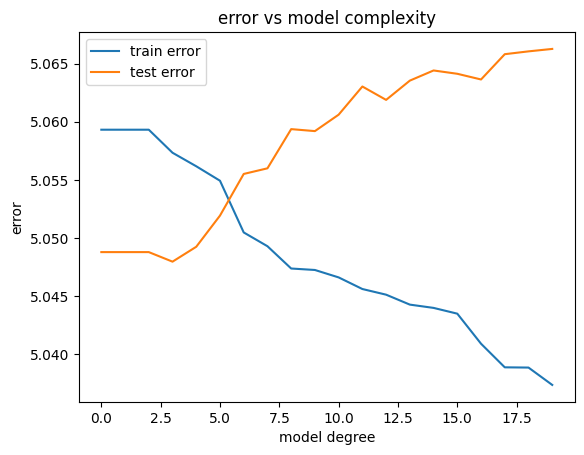

In [ ]:
plt.plot(index,train_error,label='train error')
plt.plot(index,test_error,label= 'test error')
plt.title('error vs model complexity')
plt.xlabel('model degree')
plt.ylabel('error')
plt.legend()
plt.show()

### Bias - Variance with increasing regularisation

In [ ]:
X_test_1= make_poly(X_test,20)
X_train_1 = make_poly(X_train,20)

#### L2 reg curve

In [ ]:
train_error = []
test_error = []
index=[]
for i in range (0,5):
  W_L2 = (np.linalg.inv(X_train_1.T@X_train_1 + i* np.identity(X_train_1.shape[1])))@X_train_1.T@Y_train_1  # with regularizer
  loss =(np.linalg.norm(X_train_1@W_L2-Y_train_1))**2
  MSE = loss/X_train.shape[0]
  train_error.append(MSE)
  loss =(np.linalg.norm(X_test_1@W_L2-Y_test_1))**2
  MSE = loss/X_test.shape[0]
  test_error.append(MSE)
  index.append(i)

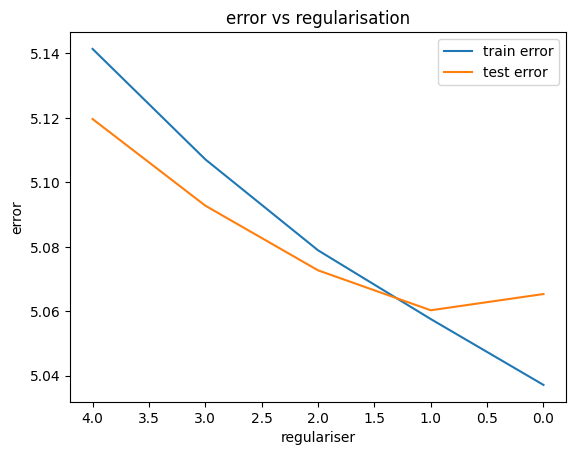

In [ ]:
plt.plot(index,train_error,label='train error')
plt.plot(index,test_error,label = 'test error')
plt.gca().invert_xaxis()
plt.title('error vs regularisation')
plt.xlabel('regulariser')
plt.ylabel('error')
plt.legend()
plt.show()

#### L1 reg curve

In [ ]:
train_error = []
test_error = []
index=[]
for i in range (1,6):
  W_L1 = L1_reg(i,0)  # with regularizer
  loss =(np.linalg.norm(X_train_1@W_L1-Y_train_1))**2
  MSE = loss/X_train.shape[0]
  train_error.append(MSE)
  loss =(np.linalg.norm(X_test_1@W_L1-Y_test_1))**2
  MSE = loss/X_test.shape[0]
  test_error.append(MSE)
  index.append(i)

Final loss is 5.047979062851404
Final loss is 5.048667033258129
Final loss is 5.0492466688974655
Final loss is 5.04995905494061
Final loss is 5.051012602972645


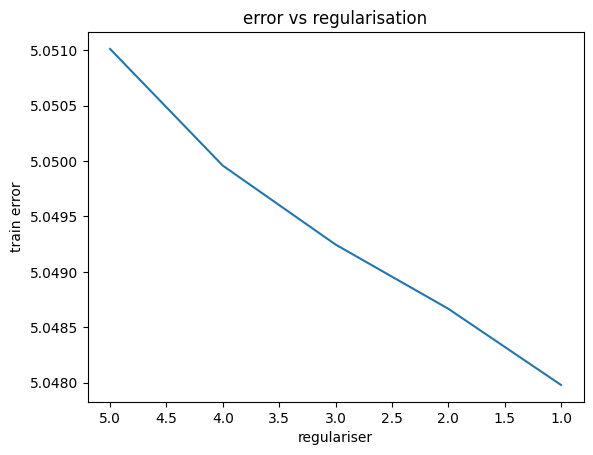

In [ ]:
plt.plot(index,train_error)
plt.gca().invert_xaxis()
plt.title('error vs regularisation')
plt.xlabel('regulariser')
plt.ylabel('train error')
plt.show()

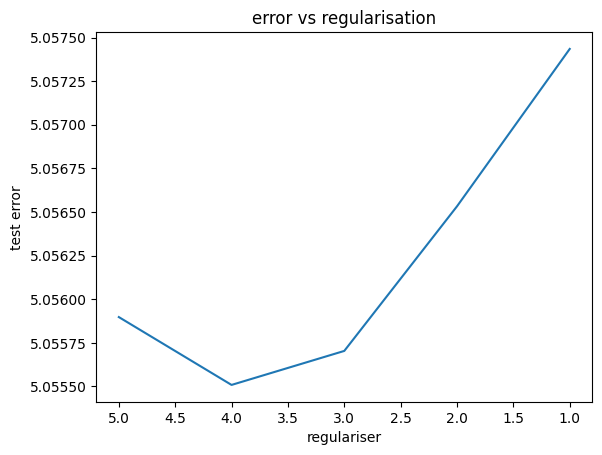

In [ ]:
plt.plot(index,test_error)
plt.gca().invert_xaxis()
plt.title('error vs regularisation')
plt.xlabel('regulariser')
plt.ylabel('test error')
plt.show()

#### L1_L2 reg curve

In [ ]:
train_error = []
test_error = []
index=[]
for i in range (1,10):
  W_L1_L2 = L1_L2_reg(0.1*i,0)  # with regularizer
  loss =(np.linalg.norm(X_train_1@W_L1_L2-Y_train_1))**2
  MSE = loss/X_train.shape[0]
  train_error.append(MSE)
  loss =(np.linalg.norm(X_test_1@W_L1_L2-Y_test_1))**2
  MSE = loss/X_test.shape[0]
  test_error.append(MSE)
  index.append(0.1*i)

Final loss is 5.04726208301203
Final loss is 5.048019786166113
Final loss is 5.048777958508776
Final loss is 5.049815248843978
Final loss is 5.050990000840477
Final loss is 5.052227661118261
Final loss is 5.053574307419383
Final loss is 5.055147539360588
Final loss is 5.056621311221938


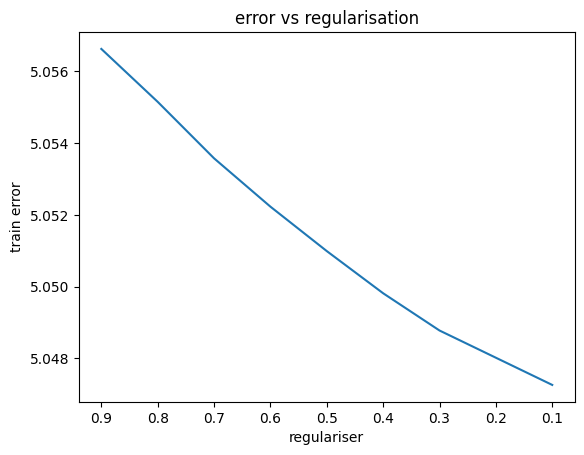

In [ ]:
plt.plot(index,train_error)
plt.gca().invert_xaxis()
plt.title('error vs regularisation')
plt.xlabel('regulariser')
plt.ylabel('train error')
plt.show()

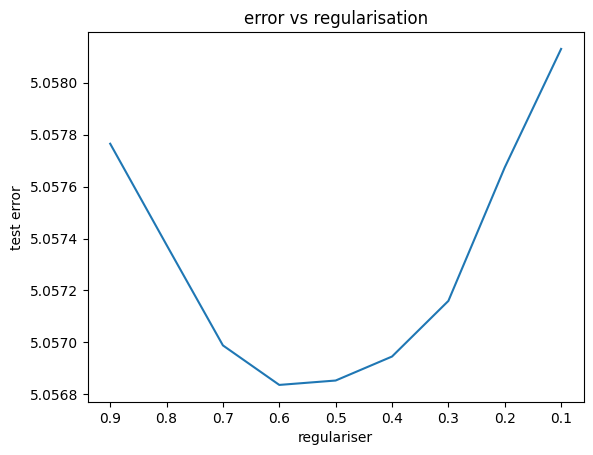

In [ ]:
plt.plot(index,test_error)
plt.gca().invert_xaxis()
plt.title('error vs regularisation')
plt.xlabel('regulariser')
plt.ylabel('test error')
plt.show()

## Model 2 (sinusoidal)

In [ ]:
Y_train_1 = Y_train
Y_test_1 = Y_test

### Fitting poly of sinusoids

In [ ]:
def make_poly_sin(X_train,d):
  # first 2 cols
  X_train_1 = np.power(X_train[:,0],1)                      # X0
  X_train_1=X_train_1/(X_train_1.max()-X_train_1.min())
  X_train_1 = X_train_1.reshape((X_train_1.shape[0],1))

  tmp = X_train[:,1]           # X1
  tmp = np.power(tmp,1)
  tmp = tmp/(tmp.max()-tmp.min())
  X_train_1=np.column_stack((X_train_1,tmp))

  tmp = np.multiply(X_train[:,0],X_train[:,1])           # X0*X1
  tmp = tmp/(tmp.max()-tmp.min())
  X_train_1=np.column_stack((X_train_1,tmp))

  # Next degree cols
  for i in range(2,d):
    tmp = X_train[:,0]          # X0^i
    tmp = np.power(tmp,i)
    tmp = np.sin(tmp)            # sin
    X_train_1=np.column_stack((X_train_1,tmp))

    tmp = X_train[:,1]          # X1^i
    tmp = np.power(tmp,i)
    tmp = np.sin(tmp)            # sin
    X_train_1=np.column_stack((X_train_1,tmp))

    tmp = X_train[:,0]          # X0^i
    tmp = np.power(tmp,i)
    tmp = np.cos(tmp)            # cos
    X_train_1=np.column_stack((X_train_1,tmp))

    tmp = X_train[:,1]          # X1^i
    tmp = np.power(tmp,i)
    tmp = np.cos(tmp)            # cos
    X_train_1=np.column_stack((X_train_1,tmp))

  # Creating augmented data matrix
  tmp = np.ones((X_train_1.shape[0],1))
  X_train_1=np.column_stack((X_train_1,tmp))
  X_train_1.shape
  return(X_train_1)

In [ ]:
X_train_1= make_poly_sin(X_train,14)

In [ ]:
X_train_1.shape

(10000, 52)

### Finding weights (Training)

In [ ]:
W = (np.linalg.inv(X_train_1.T@X_train_1))@X_train_1.T@Y_train_1  # without regularizer

In [ ]:
W_L2 = (np.linalg.inv(X_train_1.T@X_train_1 + 5 * np.identity(X_train_1.shape[1])))@X_train_1.T@Y_train_1  # with L2 regularizer

In [ ]:
W_L1 = L1_reg(1,1)

Loss in  0  epoch is  725.03335556921
Loss in  2000  epoch is  5.034877603819066
Loss in  4000  epoch is  5.034877603819066
Loss in  6000  epoch is  5.034877603819066
Loss in  8000  epoch is  5.034877603819066
Loss in  10000  epoch is  5.034877603819066
Loss in  12000  epoch is  5.034877603819066
Loss in  14000  epoch is  5.034877603819066
Final loss is 5.034877603819066


In [ ]:
W_L1_L2 = L1_L2_reg(1,1)

Loss in  0  epoch is  725.03335556921
Loss in  2000  epoch is  5.0358718646757605
Loss in  4000  epoch is  5.0358718646757605
Loss in  6000  epoch is  5.0358718646757605
Loss in  8000  epoch is  5.0358718646757605
Loss in  10000  epoch is  5.0358718646757605
Loss in  12000  epoch is  5.0358718646757605
Loss in  14000  epoch is  5.0358718646757605
Final loss is 5.0358718646757605


In [ ]:
#MSE on train dataset without regularized one
loss =(np.linalg.norm(X_train_1@W-Y_train_1))**2
MSE = loss/X_train.shape[0]
print('The Mean squared error loss for unregularised is: ',MSE)

The Mean squared error loss for unregularised is:  5.034876250147786


In [ ]:
#MSE on train dataset with regularized one
loss =(np.linalg.norm(X_train_1@W_L2-Y_train_1))**2
MSE = loss/X_train.shape[0]
print('The Mean squared error loss for L2 regularised is: ',MSE)

The Mean squared error loss for L2 regularised is:  5.058750538619654


In [ ]:
#MSE on train dataset with regularized one
loss =(np.linalg.norm(X_train_1@W_L1-Y_train_1))**2
MSE = loss/X_train.shape[0]
print('The Mean squared error loss for L1 regularised is: ',MSE)

The Mean squared error loss for L1 regularised is:  5.034877603819066


In [ ]:
#MSE on train dataset with regularized one
loss =(np.linalg.norm(X_train_1@W_L1_L2-Y_train_1))**2
MSE = loss/X_train.shape[0]
print('The Mean squared error loss for L1_L2 regularised is: ',MSE)

The Mean squared error loss for L1_L2 regularised is:  5.0358718646757605


In [ ]:
Y_pred = X_train_1@W #Y predicted

### Testing

In [ ]:
X_test_1= make_poly_sin(X_test,14)

In [ ]:
Y_pred = X_test_1@W #Y predicted

In [ ]:
#MSE on test dataset
loss =(np.linalg.norm(X_test_1@W-Y_test_1))**2
MSE = loss/X_test.shape[0]
print('The Mean squared test error loss for unregularised is: ',MSE)

The Mean squared test error loss for unregularised is:  5.069833157076739


In [ ]:
Y_pred = X_test_1@W_L2 #Y predicted

In [ ]:
#MSE on test dataset
loss =(np.linalg.norm(X_test_1@W_L2-Y_test_1))**2
MSE = loss/X_test.shape[0]
print('The Mean squared test error loss for l2 regularised is: ',MSE)

The Mean squared test error loss for l2 regularised is:  5.086720243175673


In [ ]:
#MSE on test dataset
loss =(np.linalg.norm(X_test_1@W_L1-Y_test_1))**2
MSE = loss/X_test.shape[0]
print('The Mean squared test error loss for l1 regularised is: ',MSE)

The Mean squared test error loss for l1 regularised is:  5.069622095869444


In [ ]:
#MSE on test dataset
loss =(np.linalg.norm(X_test_1@W_L1_L2-Y_test_1))**2
MSE = loss/X_test.shape[0]
print('The Mean squared test error loss for l1 l2 regularised is: ',MSE)

The Mean squared test error loss for l1 l2 regularised is:  5.0690406729281925


### Bias - Variance with increase in complexity of model

In [ ]:
train_error=[]
test_error=[]
index=[]
for i in range(1,20):
  X_train_1= make_poly_sin(X_train,i)
  X_test_1= make_poly_sin(X_test,i)
  W = (np.linalg.inv(X_train_1.T@X_train_1))@X_train_1.T@Y_train_1 
  loss =(np.linalg.norm(X_train_1@W-Y_train_1))**2
  MSE = loss/X_train.shape[0]
  train_error.append(MSE)
  loss =(np.linalg.norm(X_test_1@W-Y_test_1))**2
  MSE = loss/X_test.shape[0]
  test_error.append(MSE)
  index.append(i)

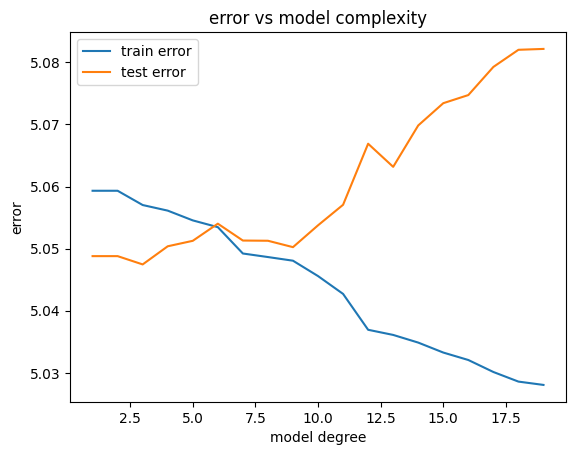

In [ ]:
plt.plot(index,train_error,label='train error')
plt.plot(index,test_error,label= 'test error')
plt.title('error vs model complexity')
plt.xlabel('model degree')
plt.ylabel('error')
plt.legend()
plt.show()

### Bias - Variance with increasing regularisation

In [ ]:
X_test_1= make_poly_sin(X_test,14)
X_train_1 = make_poly_sin(X_train,14)

#### L2 reg curve

In [ ]:
train_error = []
test_error = []
index=[]
for i in range (0,10):
  W_L2 = (np.linalg.inv(X_train_1.T@X_train_1 + 0.2*i* np.identity(X_train_1.shape[1])))@X_train_1.T@Y_train_1  # with regularizer
  loss =(np.linalg.norm(X_train_1@W_L2-Y_train_1))**2
  MSE = loss/X_train.shape[0]
  train_error.append(MSE)
  loss =(np.linalg.norm(X_test_1@W_L2-Y_test_1))**2
  MSE = loss/X_test.shape[0]
  test_error.append(MSE)
  index.append(0.2*i)

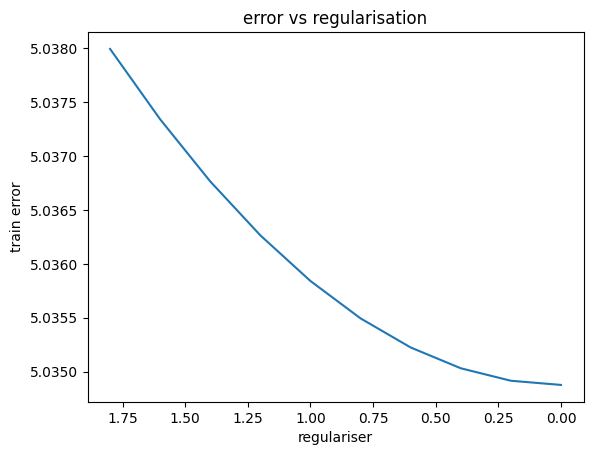

In [ ]:
plt.plot(index,train_error)
plt.gca().invert_xaxis()
plt.title('error vs regularisation')
plt.xlabel('regulariser')
plt.ylabel('train error')
plt.show()

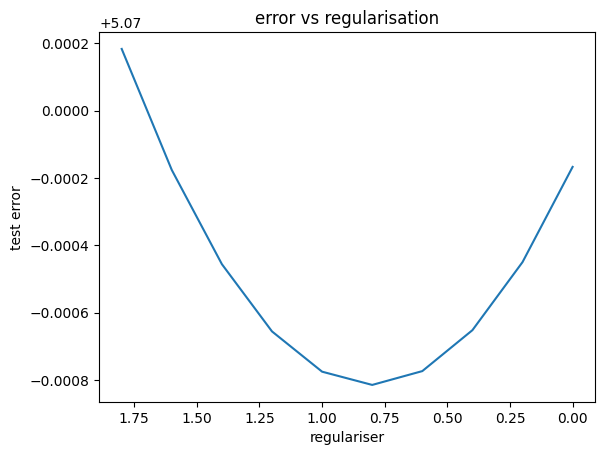

In [ ]:
plt.plot(index,test_error)
plt.gca().invert_xaxis()
plt.title('error vs regularisation')
plt.xlabel('regulariser')
plt.ylabel('test error')
plt.show()

#### L1 reg curve

In [ ]:
train_error = []
test_error = []
index=[]
for i in range (1,100,10):
  W_L1 = L1_reg(i,0)  # with regularizer
  loss =(np.linalg.norm(X_train_1@W_L1-Y_train_1))**2
  MSE = loss/X_train.shape[0]
  train_error.append(MSE)
  loss =(np.linalg.norm(X_test_1@W_L1-Y_test_1))**2
  MSE = loss/X_test.shape[0]
  test_error.append(MSE)
  index.append(i)

Final loss is 5.034877603819066
Final loss is 5.035070292197843
Final loss is 5.0355856921904705
Final loss is 5.036439162675536
Final loss is 5.037228139630078
Final loss is 5.0386493480120755
Final loss is 5.039529771173985
Final loss is 5.041445752427474
Final loss is 5.043506315428463
Final loss is 5.045616138352177


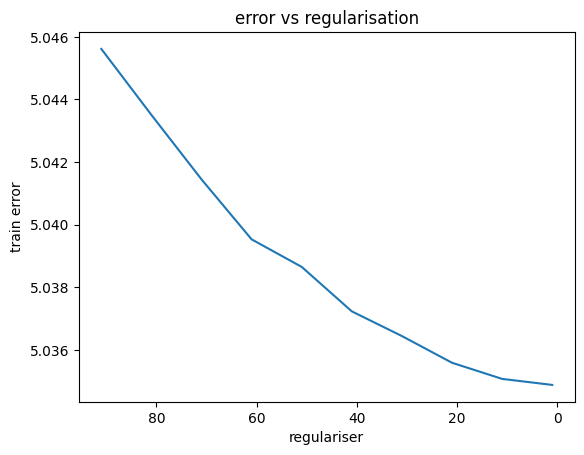

In [ ]:
plt.plot(index,train_error)
plt.gca().invert_xaxis()
plt.title('error vs regularisation')
plt.xlabel('regulariser')
plt.ylabel('train error')
plt.show()

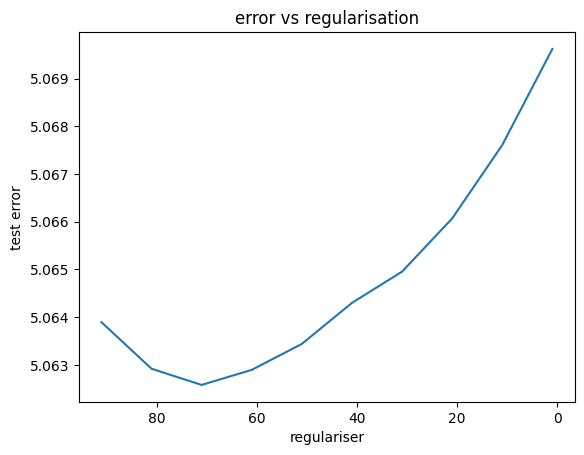

In [ ]:
plt.plot(index,test_error)
plt.gca().invert_xaxis()
plt.title('error vs regularisation')
plt.xlabel('regulariser')
plt.ylabel('test error')
plt.show()

#### L1_L2 reg curve

In [ ]:
train_error = []
test_error = []
index=[]
for i in range (1,10):
  W_L1_L2 = L1_L2_reg(0.2*i,0)  # with regularizer
  loss =(np.linalg.norm(X_train_1@W_L1_L2-Y_train_1))**2
  MSE = loss/X_train.shape[0]
  train_error.append(MSE)
  loss =(np.linalg.norm(X_test_1@W_L1_L2-Y_test_1))**2
  MSE = loss/X_test.shape[0]
  test_error.append(MSE)
  index.append(0.2*i)

Final loss is 5.034878994326813
Final loss is 5.035014818664608
Final loss is 5.035234950612048
Final loss is 5.035513693458739
Final loss is 5.0358718646757605
Final loss is 5.036308878778976
Final loss is 5.036825953627621
Final loss is 5.037421680953753
Final loss is 5.038096356569289


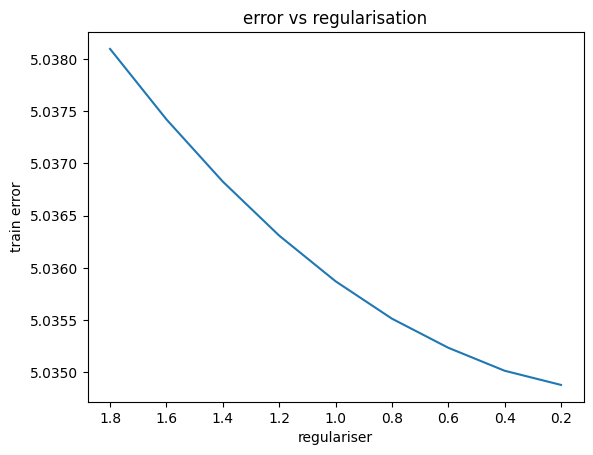

In [ ]:
plt.plot(index,train_error)
plt.gca().invert_xaxis()
plt.title('error vs regularisation')
plt.xlabel('regulariser')
plt.ylabel('train error')
plt.show()

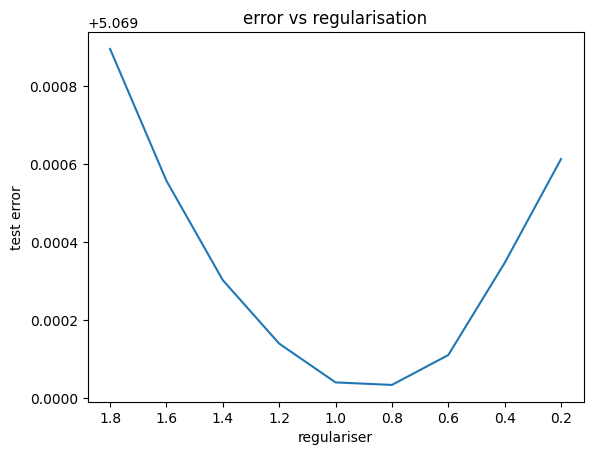

In [ ]:
plt.plot(index,test_error)
plt.gca().invert_xaxis()
plt.title('error vs regularisation')
plt.xlabel('regulariser')
plt.ylabel('test error')
plt.show()

## Model 3 (exp)

In [ ]:
Y_train_1 = Y_train
Y_test_1 = Y_test

### Fitting Polynomial

In [ ]:
def make_poly_exp(X_train,d):
  # first 2 cols
  X_train_1 = np.power(X_train[:,0],1)                      # X0
  X_train_1=X_train_1/(X_train_1.max()-X_train_1.min())
  X_train_1 = X_train_1.reshape((X_train_1.shape[0],1))

  tmp = X_train[:,1]           # X1
  tmp = np.power(tmp,1)
  tmp = tmp/(tmp.max()-tmp.min())
  X_train_1=np.column_stack((X_train_1,tmp))

  tmp = np.multiply(X_train[:,0],X_train[:,1])           # X0*X1
  tmp = tmp/(tmp.max()-tmp.min())
  X_train_1=np.column_stack((X_train_1,tmp))

  # Next degree cols
  for i in range(2,d):
    tmp = X_train[:,0]          # X0^i
    tmp = np.power(tmp,i)
    tmp = tmp/(tmp.max()-tmp.min())
    tmp = np.exp(tmp)            # sin
    X_train_1=np.column_stack((X_train_1,tmp))

    tmp = X_train[:,1]          # X1^i
    tmp = np.power(tmp,i)
    tmp = tmp/(tmp.max()-tmp.min())
    tmp = np.exp(tmp)            # sin
    X_train_1=np.column_stack((X_train_1,tmp))

  # Creating augmented data matrix
  tmp = np.ones((X_train_1.shape[0],1))
  X_train_1=np.column_stack((X_train_1,tmp))
  X_train_1.shape
  return(X_train_1)

In [ ]:
X_train_1= make_poly_exp(X_train,14)

In [ ]:
X_train_1.shape

(10000, 28)

### Finding weights (Training)

In [ ]:
W = (np.linalg.inv(X_train_1.T@X_train_1))@X_train_1.T@Y_train_1  # without regularizer

In [ ]:
W_L2 = (np.linalg.inv(X_train_1.T@X_train_1 + 5 * np.identity(X_train_1.shape[1])))@X_train_1.T@Y_train_1  # with L2 regularizer

In [ ]:
W_L1 = L1_reg(1,1)

Loss in  0  epoch is  1348.6969338012636
Loss in  2000  epoch is  14.252502074013735
Loss in  4000  epoch is  13.734839101228152
Loss in  6000  epoch is  5.56096007626906
Loss in  8000  epoch is  5.450318016179376
Loss in  10000  epoch is  5.354682138941517
Loss in  12000  epoch is  5.273279242070863
Loss in  14000  epoch is  5.205412695679627
Final loss is 5.1780718834813575


In [ ]:
W_L1_L2 = L1_L2_reg(1,1)

Loss in  0  epoch is  1348.6969338012636
Loss in  2000  epoch is  14.260998676599627
Loss in  4000  epoch is  5.905447664170532
Loss in  6000  epoch is  5.753580283984044
Loss in  8000  epoch is  5.619157034702337
Loss in  10000  epoch is  5.501060703414693
Loss in  12000  epoch is  5.398363704611079
Loss in  14000  epoch is  5.310246418014243
Final loss is 5.271469336863849


In [ ]:
#MSE on train dataset without regularized one
loss =(np.linalg.norm(X_train_1@W-Y_train_1))**2
MSE = loss/X_train.shape[0]
print('The Mean squared error loss for unregularised is: ',MSE)

The Mean squared error loss for unregularised is:  5.0429029894214015


In [ ]:
#MSE on train dataset with regularized one
loss =(np.linalg.norm(X_train_1@W_L2-Y_train_1))**2
MSE = loss/X_train.shape[0]
print('The Mean squared error loss for L2 regularised is: ',MSE)

The Mean squared error loss for L2 regularised is:  5.169053333840939


In [ ]:
#MSE on train dataset with regularized one
loss =(np.linalg.norm(X_train_1@W_L1-Y_train_1))**2
MSE = loss/X_train.shape[0]
print('The Mean squared error loss for L1 regularised is: ',MSE)

The Mean squared error loss for L1 regularised is:  5.17804773851268


In [ ]:
#MSE on train dataset with regularized one
loss =(np.linalg.norm(X_train_1@W_L1_L2-Y_train_1))**2
MSE = loss/X_train.shape[0]
print('The Mean squared error loss for L1_L2 regularised is: ',MSE)

The Mean squared error loss for L1_L2 regularised is:  5.271432224867515


In [ ]:
Y_pred = X_train_1@W #Y predicted

### Testing

In [ ]:
X_test_1= make_poly_exp(X_test,14)

In [ ]:
Y_pred = X_test_1@W #Y predicted

In [ ]:
#MSE on test dataset
loss =(np.linalg.norm(X_test_1@W-Y_test_1))**2
MSE = loss/X_test.shape[0]
print('The Mean squared test error loss for unregularised is: ',MSE)

The Mean squared test error loss for unregularised is:  5.064683750571326


In [ ]:
Y_pred = X_test_1@W_L2 #Y predicted

In [ ]:
#MSE on test dataset
loss =(np.linalg.norm(X_test_1@W_L2-Y_test_1))**2
MSE = loss/X_test.shape[0]
print('The Mean squared test error loss for l2 regularised is: ',MSE)

The Mean squared test error loss for l2 regularised is:  5.128399268188102


In [ ]:
#MSE on test dataset
loss =(np.linalg.norm(X_test_1@W_L1-Y_test_1))**2
MSE = loss/X_test.shape[0]
print('The Mean squared test error loss for l1 regularised is: ',MSE)

The Mean squared test error loss for l1 regularised is:  5.1291571646338205


In [ ]:
#MSE on test dataset
loss =(np.linalg.norm(X_test_1@W_L1_L2-Y_test_1))**2
MSE = loss/X_test.shape[0]
print('The Mean squared test error loss for l1 l2 regularised is: ',MSE)

The Mean squared test error loss for l1 l2 regularised is:  5.205497777556953


### Bias - Variance with increase in complexity of model

In [ ]:
train_error=[]
test_error=[]
index=[]
for i in range(0,20):
  X_train_1= make_poly_exp(X_train,i)
  X_test_1= make_poly_exp(X_test,i)
  W = (np.linalg.inv(X_train_1.T@X_train_1))@X_train_1.T@Y_train_1 
  loss =(np.linalg.norm(X_train_1@W-Y_train_1))**2
  MSE = loss/X_train.shape[0]
  train_error.append(MSE)
  loss =(np.linalg.norm(X_test_1@W-Y_test_1))**2
  MSE = loss/X_test.shape[0]
  test_error.append(MSE)
  index.append(i)

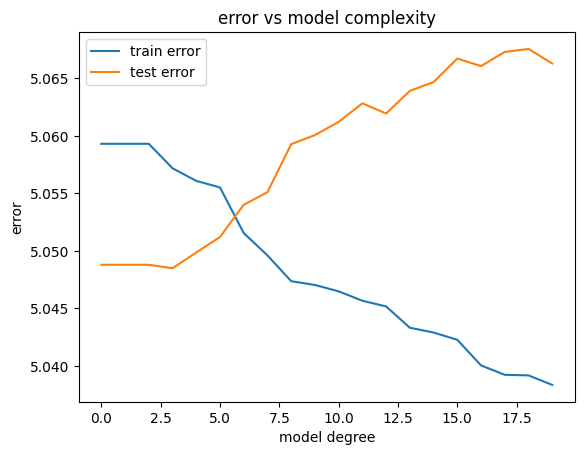

In [ ]:
plt.plot(index,train_error,label='train error')
plt.plot(index,test_error,label= 'test error')
plt.title('error vs model complexity')
plt.xlabel('model degree')
plt.ylabel('error')
plt.legend()
plt.show()

### Bias - Variance with increasing regularisation

In [ ]:
X_test_1= make_poly_exp(X_test,14)
X_train_1 = make_poly_exp(X_train,14)

#### L2 reg curve

In [ ]:
train_error = []
test_error = []
index=[]
for i in range (0,5):
  W_L2 = (np.linalg.inv(X_train_1.T@X_train_1 + i* np.identity(X_train_1.shape[1])))@X_train_1.T@Y_train_1  # with regularizer
  loss =(np.linalg.norm(X_train_1@W_L2-Y_train_1))**2
  MSE = loss/X_train.shape[0]
  train_error.append(MSE)
  loss =(np.linalg.norm(X_test_1@W_L2-Y_test_1))**2
  MSE = loss/X_test.shape[0]
  test_error.append(MSE)
  index.append(i)

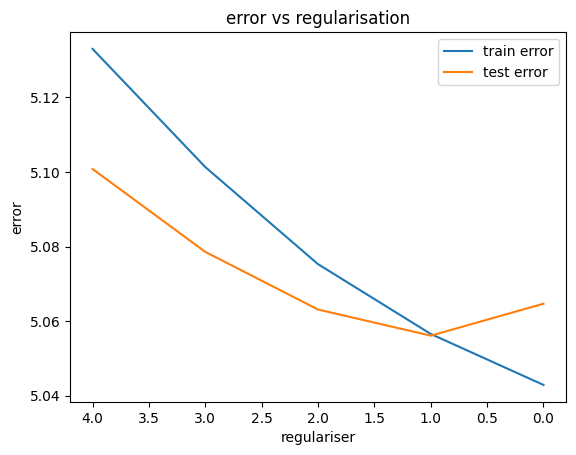

In [ ]:
plt.plot(index,train_error,label='train error')
plt.plot(index,test_error,label = 'test error')
plt.gca().invert_xaxis()
plt.title('error vs regularisation')
plt.xlabel('regulariser')
plt.ylabel('error')
plt.legend()
plt.show()

#### L1 reg curve

In [ ]:
train_error = []
test_error = []
index=[]
for i in range (5,15):
  W_L1 = L1_reg(i,0)  # with regularizer
  loss =(np.linalg.norm(X_train_1@W_L1-Y_train_1))**2
  MSE = loss/X_train.shape[0]
  train_error.append(MSE)
  loss =(np.linalg.norm(X_test_1@W_L1-Y_test_1))**2
  MSE = loss/X_test.shape[0]
  test_error.append(MSE)
  index.append(i)

Final loss is 5.127608612309963
Final loss is 5.1276144156913706
Final loss is 5.128163117976702
Final loss is 5.129101873506849
Final loss is 5.12934233623799
Final loss is 5.12985353779847
Final loss is 5.130842732633443
Final loss is 5.131949491957857
Final loss is 5.133263384105643
Final loss is 5.133681258770289


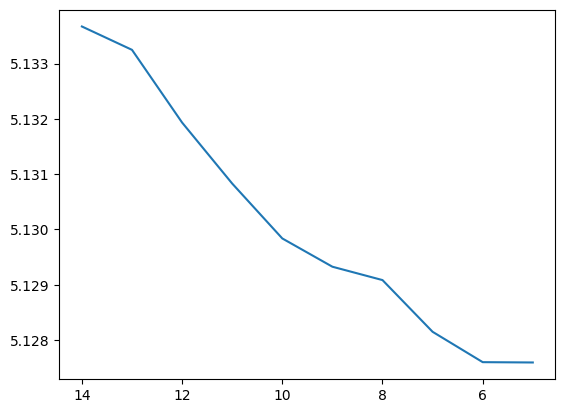

In [ ]:
# Train error vs regulariser coefficient
plt.plot(index,train_error)
plt.gca().invert_xaxis()

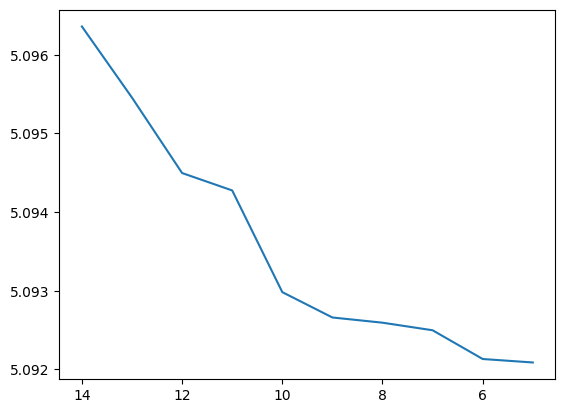

In [ ]:
# Test error vs regulariser coefficient
plt.plot(index,test_error)
plt.gca().invert_xaxis()

#### L1_L2 reg curve

In [ ]:
train_error = []
test_error = []
index=[]
for i in range (5,15):
  W_L1_L2 = L1_L2_reg(i,0)  # with regularizer
  loss =(np.linalg.norm(X_train_1@W_L1_L2-Y_train_1))**2
  MSE = loss/X_train.shape[0]
  train_error.append(MSE)
  loss =(np.linalg.norm(X_test_1@W_L1_L2-Y_test_1))**2
  MSE = loss/X_test.shape[0]
  test_error.append(MSE)
  index.append(i)

Final loss is 5.258680651494645
Final loss is 5.291693949333602
Final loss is 5.324668277194512
Final loss is 5.359425318538992
Final loss is 5.396006160842399
Final loss is 5.433755902583384
Final loss is 5.474716098968171
Final loss is 5.517038076296795
Final loss is 5.5608416479387
Final loss is 5.608178905945881


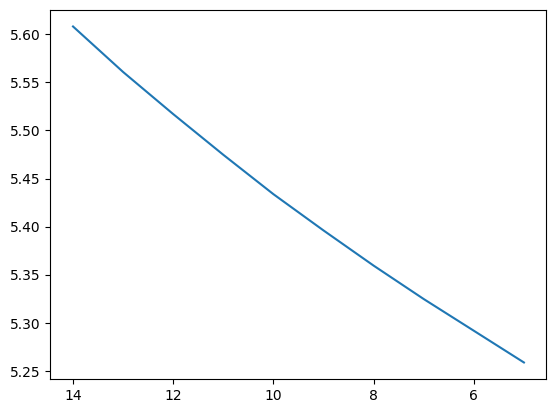

In [ ]:
# Train error vs regulariser coefficient
plt.plot(index,train_error)
plt.gca().invert_xaxis()

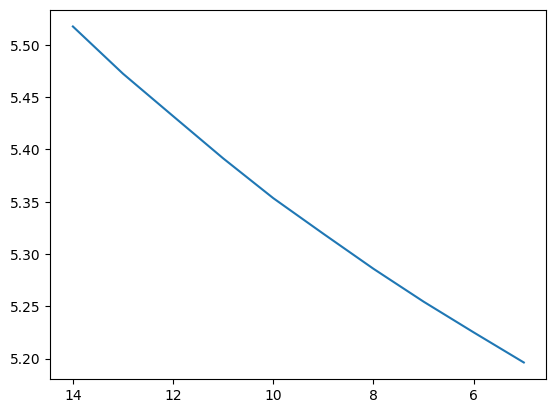

In [ ]:
# Test error vs regulariser coefficient
plt.plot(index,test_error)
plt.gca().invert_xaxis()

# QUESTION 4

In [ ]:
import numpy as np
import math

## Extracting images from zip file and importing to colab

In [ ]:
# These following imports are required because we have to upload image files from drive to colab
import zipfile # To unzip
import os      # To upload files
import cv2     # To read image files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set the path of the zip file in Google Drive
zip_path = "/content/drive/MyDrive/Colab Notebooks/PRNN_A1/Prnn_datasets/Assignment1_resized_images.zip"

# Set the path to extract the zip file to in the Colab environment
extract_path = "/content"

# Extract the zip file to the specified path
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
extract_path = "/content/Assignment1_resized_images"

In [ ]:
# Creating a list of list of images of particular class 
lst_img_clss = []
for class_folder in sorted(os.listdir(extract_path)):
  class_folder_path = os.path.join(extract_path, class_folder)
  temp = []
  for filename in sorted(os.listdir(class_folder_path)):
    file_paths = os.path.join(class_folder_path, filename)
    img = cv2.imread(file_paths)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    temp.append(gray_img)
  lst_img_clss.append(temp)

In [ ]:
classes = 10

In [ ]:
X=[]
Y = []
for i in range(classes):
  tmp = []
  for j in range(len(lst_img_clss[i])):
    x = np.ndarray.flatten(lst_img_clss[i][j])
    tmp.append(x)
  a = np.stack(tmp,axis = 0)
  X.append(a)
  Y.append(i)


In [ ]:
a = X[0]
b = np.zeros((X[0].shape[0],1))
dataset = np.column_stack((a,b))
for i in range(1,classes):
  a=X[i]
  b = i*np.ones((X[i].shape[0],1))
  temp = np.column_stack((a,b))
  dataset = np.row_stack((dataset,temp))

In [ ]:
dataset.shape  # Overall dataset

(60000, 785)

In [ ]:
np.random.shuffle(dataset)

In [ ]:
dataset

array([[255., 255., 255., ..., 255., 255.,   8.],
       [255., 255., 255., ..., 255., 255.,   3.],
       [255., 255., 255., ..., 255., 255.,   4.],
       ...,
       [255., 255., 255., ..., 255., 255.,   5.],
       [255., 255., 255., ..., 255., 255.,   5.],
       [255., 255., 255., ..., 255., 255.,   4.]])

In [ ]:
features = dataset.shape[1]-1 #784

In [ ]:
X_train = dataset[:30000,:features]/255
Y_train = dataset[:30000,features]
X_test = dataset[30000:60000,:features]/255
Y_test = dataset[30000:60000,features]

In [ ]:
X_train.shape

(30000, 784)

In [ ]:
Y_test.min()

0.0

## Creating Neural Network

In [ ]:
class neural_net:
  def __init__(self,input_size,neurons):
    #self.weights = 0.1 * np.ones((input_size,neurons))
    self.weights =  np.random.randn(input_size,neurons)
    self.biases = np.zeros((neurons,1))
  def forward(self,inputs):
    self.inputs = inputs
    self.output = self.weights.T@inputs + self.biases
  def backward(self,dvalues):
    self.dweights = self.inputs@dvalues.T  #gives a matrix
    self.dbiases =  dvalues

    self.dinputs = self.weights@dvalues

In [ ]:
class sigmoid_activation:
  def forward(self,input):
    self.inputs = input
    self.output = 1/(1+np.exp(-input))
  def backward(self,dvalues):
    self.dinputs = dvalues * self.output * (1-self.output)

In [ ]:
class relu_activation:
  def forward(self,input):
    self.inputs = input
    self.output = np.maximum(0,input)
    self.output = np.minimum(self.output,1)
  def backward(self,dvalues):
    self.dinputs = dvalues * np.greater(self.inputs, 0).astype(int)
    self.dinputs = self.dinputs * np.less(self.dinputs, 1).astype(int)

In [ ]:
class softmax_activation:
  def forward(self,input):
    self.input = input
    exp_values = np.exp(input)
    prob = exp_values/(np.sum(exp_values))
    self.output = prob
  def backward(self,dvalues):
    s =dvalues.shape[0]
    jac = np.zeros((s,s))
    for i in range(s):
      for j in range(s):
        k=0
        if i==j:
          k=1
        jac[i][j]= self.output[i][0]*(k-self.output[j][0])  #ddi/dnj
    self.dinputs = jac.T@dvalues

In [ ]:
class grad_des_optimizer:
  def __init__(self,alpha = 0.01):
    self.alpha = alpha
  def store_params(self,layer):
    if not hasattr(layer,'sgd_flag'):
      layer.sgd_flag = 1
      #print("Hi")
      layer.dweight_curr_itr_sum = np.zeros_like(layer.weights)
      layer.dbias_curr_itr_sum = np.zeros_like(layer.biases)

    layer.dweight_curr_itr_sum = layer.dweight_curr_itr_sum + layer.dweights
    layer.dbias_curr_itr_sum = layer.dbias_curr_itr_sum + layer.dbiases
  def update(self,layer,batch_size):
    layer.weights = layer.weights -  self.alpha * layer.dweight_curr_itr_sum/batch_size
    layer.biases = layer.biases -  self.alpha * layer.dbias_curr_itr_sum/batch_size

    layer.dweight_curr_itr_sum = np.zeros_like(layer.weights)
    layer.dbias_curr_itr_sum = np.zeros_like(layer.biases)

In [ ]:
class adam_optimizer:
  def __init__(self,alpha = 0.01,beta_1=0.9,beta_2=0.9):
    self.alpha = alpha
    self.beta_1 = beta_1
    self.beta_2 = beta_2
  def store_params(self,layer):
    if not hasattr(layer,'adam_flag'):
      layer.adam_flag=1
      layer.dweight_sum = np.zeros_like(layer.weights)
      layer.dbias_sum = np.zeros_like(layer.biases)
      layer.dweight_sq_sum = np.zeros_like(layer.weights)
      layer.dbias_sq_sum = np.zeros_like(layer.biases)

      layer.dweight_curr_itr_sum = np.zeros_like(layer.weights)
      layer.dbias_curr_itr_sum = np.zeros_like(layer.biases)

    layer.dweight_sum = self.beta_1*layer.dweight_sum+(1-self.beta_1)*layer.dweights
    layer.dbias_sum =  self.beta_1*layer.dbias_sum+(1-self.beta_1)*layer.dbiases
    layer.dweight_sq_sum = self.beta_2*layer.dweight_sq_sum+(1-self.beta_2)*layer.dweights**2
    layer.dbias_sq_sum =  self.beta_2*layer.dbias_sq_sum+(1-self.beta_2)*layer.dbiases**2
    layer.dweight_curr_itr_sum = layer.dweight_curr_itr_sum + layer.dweights
    layer.dbias_sq_sum = layer.dbias_sq_sum + layer.dbiases
  def update(self,layer,batch_size):
    layer.weights = layer.weights -  self.alpha* layer.dweight_curr_itr_sum/batch_size
    layer.biases = layer.biases -  self.alpha * layer.dbias_curr_itr_sum/batch_size

    layer.dweight_curr_itr_sum = np.zeros_like(layer.weights)
    layer.dbias_curr_itr_sum = np.zeros_like(layer.biases)

### Squared error loss

#### Model 1 with vanilla sgd optimizer

In [ ]:
sgd_opt = grad_des_optimizer(0.1) # This constant step size is choosen by trial and error

In [ ]:
# creating 3 layer neural net
layer1 = neural_net(784,50)
act1 = sigmoid_activation()
layer2 = neural_net(50,25)
act2 = sigmoid_activation()
layer3 = neural_net(25,10)

In [ ]:
#Training
nb = 1  #batch size
for epochs in range(20):
  loss = 0
  for i in range(X_train.shape[0]):

    x=X_train[i,:]
    y = Y_train[i]
    x = x.reshape((x.shape[0],1))
    yl = np.zeros((classes,1))          # y is label
    yl[int(y)][0]=1

    layer1.forward(x)    # x is feature vector
    act1.forward(layer1.output)
    layer2.forward(act1.output)
    act2.forward(layer2.output)
    layer3.forward(act2.output)
    pred = layer3.output
    
    loss = loss+np.linalg.norm(pred-yl)
    dinput_l = (pred-yl)     # Check the sign here else will diverge

    layer3.backward(dinput_l)
    sgd_opt.store_params(layer3)

    act2.backward(layer3.dinputs)

    layer2.backward(act2.dinputs)
    sgd_opt.store_params(layer2)

    act1.backward(layer2.dinputs)

    layer1.backward(act1.dinputs)
    sgd_opt.store_params(layer1)

    if(i%nb==0):
      sgd_opt.update(layer3,nb)
      sgd_opt.update(layer2,nb)
      sgd_opt.update(layer1,nb)

  print(loss)

  # opt.update(layer3,2)
  # opt.update(layer2,2)
  # opt.update(layer1,2)

31723.553875124766
28600.4441377115
25634.79104112038
22382.285581693035
18243.678467804508
15225.745120945272
12843.889735104756
12071.04705091551
11298.610233622967
10800.47900802889
10474.42482257663
10079.500839826103
9900.900906910618
9622.287206878422
9342.009168015738
9129.961354056033
8985.268630889765
8787.884969765595
8473.318250284943
8365.254568791097


In [ ]:
#Testing
conf_matrix = np.zeros((classes,classes))
loss = 0
count = 0
for i in range(X_test.shape[0]):
  x = X_test[i,:]
  y = Y_test[i]
  x = x.reshape((x.shape[0],1))
  yl = np.zeros((classes,1))          # y is label
  yl[int(y)][0]=1

  layer1.forward(x)    # x is feature vector
  act1.forward(layer1.output)
  layer2.forward(act1.output)
  act2.forward(layer2.output)
  layer3.forward(act2.output)
  pred = layer3.output

  loss = loss+np.linalg.norm(pred-yl)
  if np.argmax(pred)==int(y):
    count+=1
  k = np.argmax(pred)
  v = int(y)
  conf_matrix[v][k] += 1
print(loss)
print(count * 100 /X_test.shape[0])


8794.796560561603
88.39333333333333


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.9136462335059296, 0.9456241956241956, 0.9266730707652898, 0.8351648351648352, 0.8975873122996457, 0.8457446808510638, 0.8505084231294582, 0.8014994644769725, 0.9092963202065849, 0.9078374455732946]


#### Model 2 with adam optimizer

In [ ]:
adam_opt = adam_optimizer()

In [ ]:
# creating 3 layer neural net
layer1 = neural_net(784,80)
act1 = sigmoid_activation()
layer2 = neural_net(80,50)
act2 = sigmoid_activation()
layer3 = neural_net(50,25)
act3 = sigmoid_activation()
layer4 = neural_net(25,10)

In [ ]:
#Training
nb = 1  #batch size
for epochs in range(20):
  loss = 0
  for i in range(X_train.shape[0]):

    x=X_train[i,:]
    y = Y_train[i]
    x = x.reshape((x.shape[0],1))
    yl = np.zeros((classes,1))          # y is label
    yl[int(y)][0]=1

    layer1.forward(x)    # x is feature vector
    act1.forward(layer1.output)
    layer2.forward(act1.output)
    act2.forward(layer2.output)
    layer3.forward(act2.output)
    act3.forward(layer3.output)
    layer4.forward(act3.output)
    pred = layer4.output

    
    loss = loss+np.linalg.norm(pred-yl)
    dinput_l = (pred-yl)     # Check the sign here else will diverge

    layer4.backward(dinput_l)
    adam_opt.store_params(layer4)

    act3.backward(layer4.dinputs)

    layer3.backward(act3.dinputs)
    adam_opt.store_params(layer3)

    act2.backward(layer3.dinputs)

    layer2.backward(act2.dinputs)
    adam_opt.store_params(layer2)

    act1.backward(layer2.dinputs)

    layer1.backward(act1.dinputs)
    adam_opt.store_params(layer1)

    if(i%nb==0):
      adam_opt.update(layer4,nb)
      adam_opt.update(layer3,nb)
      adam_opt.update(layer2,nb)
      adam_opt.update(layer1,nb)

  print(loss)

  # opt.update(layer3,2)
  # opt.update(layer2,2)
  # opt.update(layer1,2)

26714.450989791552
23691.055649750848
21439.875604396773
19290.367922123693
16972.695508661032
15009.334211074358
13671.96043970389
12698.335231876656
11949.966815179032
11351.762576194807
10858.102577157766
10438.690603192324
10074.052713225556
9752.602944749731
9465.738117611201
9207.058101313369
8971.550676782777
8755.377148441388
8556.059484775724
8371.648032261128


In [ ]:
#Testing
conf_matrix = np.zeros((classes,classes))
loss = 0
count = 0
for i in range(X_test.shape[0]):
  x = X_test[i,:]
  y = Y_test[i]
  x = x.reshape((x.shape[0],1))
  yl = np.zeros((classes,1))          # y is label
  yl[int(y)][0]=1

  layer1.forward(x)    # x is feature vector
  act1.forward(layer1.output)
  layer2.forward(act1.output)
  act2.forward(layer2.output)
  layer3.forward(act2.output)
  act3.forward(layer3.output)
  layer4.forward(act3.output)
  pred = layer4.output

  loss = loss+np.linalg.norm(pred-yl)
  if np.argmax(pred)==int(y):
    count+=1
  k = np.argmax(pred)
  v = int(y)
  conf_matrix[v][k] += 1
print(loss)
print(count * 100 /X_test.shape[0])


8805.154305125607
90.79666666666667


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.9224672639558925, 0.9336989837070495, 0.9630001674200569, 0.8878127522195319, 0.911151256363935, 0.9048023078228407, 0.8597626752966558, 0.8287486086818254, 0.9439084219133279, 0.9246726747151844]


#### Model 3 (5 layers and adam)

In [ ]:
adam_opt = adam_optimizer() # This constant step size is choosen by trial and error

In [ ]:
# creating 3 layer neural net
layer1 = neural_net(784,100)
act1 = sigmoid_activation()
layer2 = neural_net(100,80)
act2 = sigmoid_activation()
layer3 = neural_net(80,40)
act3 = sigmoid_activation()
layer4 = neural_net(40,20)
act4 = sigmoid_activation()
layer5 = neural_net(20,10)


In [ ]:
#Training
nb = 1  #batch size
for epochs in range(20):
  loss = 0
  for i in range(X_train.shape[0]):

    x=X_train[i,:]
    y = Y_train[i]
    x = x.reshape((x.shape[0],1))
    yl = np.zeros((classes,1))          # y is label
    yl[int(y)][0]=1

    layer1.forward(x)    # x is feature vector
    act1.forward(layer1.output)
    layer2.forward(act1.output)
    act2.forward(layer2.output)
    layer3.forward(act2.output)
    act3.forward(layer3.output)
    layer4.forward(act3.output)
    act4.forward(layer4.output)
    layer5.forward(act4.output)
    pred = layer5.output

    
    loss = loss+np.linalg.norm(pred-yl)
    dinput_l = (pred-yl)     # Check the sign here else will diverge

    layer5.backward(dinput_l)
    adam_opt.store_params(layer5)

    act4.backward(layer5.dinputs)

    layer4.backward(act4.dinputs)
    adam_opt.store_params(layer4)

    act3.backward(layer4.dinputs)

    layer3.backward(act3.dinputs)
    adam_opt.store_params(layer3)

    act2.backward(layer3.dinputs)

    layer2.backward(act2.dinputs)
    adam_opt.store_params(layer2)

    act1.backward(layer2.dinputs)

    layer1.backward(act1.dinputs)
    adam_opt.store_params(layer1)

    if(i%nb==0):
      adam_opt.update(layer5,nb)
      adam_opt.update(layer4,nb)
      adam_opt.update(layer3,nb)
      adam_opt.update(layer2,nb)
      adam_opt.update(layer1,nb)

  print(loss)

  # opt.update(layer3,2)
  # opt.update(layer2,2)
  # opt.update(layer1,2)

27444.06768888085
24127.722337829713
21123.465703643884
18105.145247313525
16042.732272669866
14633.721687429173
13451.989678383994
12295.357224393274
11323.981090681396
10584.754742405888
9998.623046712135
9517.49382177546
9112.761473865854
8764.711145604017
8461.514677802514
8195.033507790653
7959.6088828153715
7749.179967391684
7558.574572965639
7383.917895516956


In [ ]:
#Testing
conf_matrix = np.zeros((classes,classes))
loss = 0
count = 0
for i in range(X_test.shape[0]):
  x = X_test[i,:]
  y = Y_test[i]
  x = x.reshape((x.shape[0],1))
  yl = np.zeros((classes,1))          # y is label
  yl[int(y)][0]=1

  layer1.forward(x)    # x is feature vector
  act1.forward(layer1.output)
  layer2.forward(act1.output)
  act2.forward(layer2.output)
  layer3.forward(act2.output)
  act3.forward(layer3.output)
  layer4.forward(act3.output)
  act4.forward(layer4.output)
  layer5.forward(act4.output)
  pred = layer5.output

  loss = loss+np.linalg.norm(pred-yl)
  if np.argmax(pred)==int(y):
    count+=1
  k = np.argmax(pred)
  v = int(y)
  conf_matrix[v][k] += 1
print(loss)
print(count * 100 /X_test.shape[0])


7335.978171029325
90.95333333333333


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.9213367609254499, 0.9406614785992218, 0.9626653273062112, 0.8750397456279809, 0.9256254225828262, 0.9089023336214348, 0.8585580627407815, 0.8254556688291628, 0.9379757085020243, 0.942187763357492]


### Cross Entropy loss

#### Model 1 with vanilla sgd optimizer

In [ ]:
sgd_opt = grad_des_optimizer()

In [ ]:
# creating 3 layer neural net
layer1 = neural_net(784,50)
act1 = sigmoid_activation()
layer2 = neural_net(50,25)
act2 = sigmoid_activation()
layer3 = neural_net(25,10)
softmax = softmax_activation()

In [ ]:
#Training
nb = 1  #batch size
for epochs in range(20):
  loss = 0
  for i in range(X_train.shape[0]):

    x=X_train[i,:]
    y = Y_train[i]
    x = x.reshape((x.shape[0],1))
    yl = np.zeros((classes,1))          # y is label
    yl[int(y)][0]=1

    layer1.forward(x)    # x is feature vector
    act1.forward(layer1.output)
    layer2.forward(act1.output)
    act2.forward(layer2.output)
    layer3.forward(act2.output)
    softmax.forward(layer3.output)
    pred = softmax.output
    
    loss = loss-math.log(pred[int(y)])
    dinput_l = -yl * 1/pred     # take loss derivative wrt pred

    softmax.backward(dinput_l)

    layer3.backward(softmax.dinputs)
    sgd_opt.store_params(layer3)

    act2.backward(layer3.dinputs)

    layer2.backward(act2.dinputs)
    sgd_opt.store_params(layer2)

    act1.backward(layer2.dinputs)

    layer1.backward(act1.dinputs)
    sgd_opt.store_params(layer1)

    if(i%nb==0):
      sgd_opt.update(layer3,nb)
      sgd_opt.update(layer2,nb)
      sgd_opt.update(layer1,nb)

  print(loss)

  # opt.update(layer3,2)
  # opt.update(layer2,2)
  # opt.update(layer1,2)

36877.25701319077
16565.821945363306
12926.672171798042
11344.278750846144
10359.573807374463
9700.783467899922
9122.677852205297
8758.753743011212
8369.091773995313
8105.143163939808
7938.889936336378
7671.799421738505
7538.120157470904
7361.764434822423
7250.206601244301
6940.1956372562945
6921.574866400329
6692.602653370694
6692.0552155169435
6632.396670641088


In [ ]:
#Testing
conf_matrix = np.zeros((classes,classes))
loss = 0
count = 0
for i in range(X_test.shape[0]):
  x = X_test[i,:]
  y = Y_test[i]
  x = x.reshape((x.shape[0],1))
  yl = np.zeros((classes,1))          # y is label
  yl[int(y)][0]=1

  layer1.forward(x)    # x is feature vector
  act1.forward(layer1.output)
  layer2.forward(act1.output)
  act2.forward(layer2.output)
  layer3.forward(act2.output)
  softmax.forward(layer3.output)
  pred = softmax.output

  loss = loss-math.log(pred[int(y)])
  if np.argmax(pred)==int(y):
    count+=1
  k = np.argmax(pred)
  v = int(y)
  conf_matrix[v][k] += 1
print(loss)
print(count * 100 /X_test.shape[0])


9413.635038103666
90.58333333333333


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.9022000963545849, 0.9181692094313454, 0.9772311783280705, 0.8833755274261603, 0.8822768434670116, 0.9199796988665201, 0.8705454545454545, 0.8333591211511682, 0.9338023664854493, 0.9364122005859038]


#### Model 2 with adam optimizer

In [ ]:
adam_opt = adam_optimizer()

In [ ]:
# creating 3 layer neural net
layer1 = neural_net(784,60)
act1 = sigmoid_activation()
layer2 = neural_net(60,10)
softmax = softmax_activation()

In [ ]:
#Training
nb = 1  #batch size
for epochs in range(20):
  loss = 0
  for i in range(X_train.shape[0]):

    x=X_train[i,:]
    y = Y_train[i]
    x = x.reshape((x.shape[0],1))
    yl = np.zeros((classes,1))          # y is label
    yl[int(y)][0]=1

    layer1.forward(x)    # x is feature vector
    act1.forward(layer1.output)
    layer2.forward(act1.output)
    softmax.forward(layer2.output)
    pred = softmax.output
    
    loss = loss-math.log(pred[int(y)])
    dinput_l = -yl * 1/pred     # take loss derivative wrt pred

    softmax.backward(dinput_l)

    layer2.backward(softmax.dinputs)
    adam_opt.store_params(layer2)

    act1.backward(layer2.dinputs)

    layer1.backward(act1.dinputs)
    adam_opt.store_params(layer1)

    if(i%nb==0):
      adam_opt.update(layer2,nb)
      adam_opt.update(layer1,nb)

  print(loss)

  # opt.update(layer3,2)
  # opt.update(layer2,2)
  # opt.update(layer1,2)

35709.144689976834
16319.298293000042
12586.547408314533
10925.150861939055
9962.05706889638
9312.795639986783
8854.086656399606
8383.938724526415
8104.194657811144
7863.280666390827
7600.452341313162
7413.768157922096
7255.67883228075
7124.0787886188555
6953.858768190832
6845.956670895617
6735.777404478212
6571.841305260177
6499.516758228524
6373.837459342295


In [ ]:
#Testing
conf_matrix = np.zeros((classes,classes))
loss = 0
count = 0
for i in range(X_test.shape[0]):
  x = X_test[i,:]
  y = Y_test[i]
  x = x.reshape((x.shape[0],1))
  yl = np.zeros((classes,1))          # y is label
  yl[int(y)][0]=1

  layer1.forward(x)    # x is feature vector
  act1.forward(layer1.output)
  layer2.forward(act1.output)
  softmax.forward(layer2.output)
  pred = softmax.output

  loss = loss-math.log(pred[int(y)])
  if np.argmax(pred)==int(y):
    count+=1
  k = np.argmax(pred)
  v = int(y)
  conf_matrix[v][k] += 1
print(loss)
print(count * 100 /X_test.shape[0])


7423.352051076133
92.51


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.930379746835443, 0.9562126353207303, 0.9694656488549618, 0.9047386419149975, 0.9278870398386283, 0.916075845012366, 0.8940385635945516, 0.855787476280835, 0.9528602583459151, 0.9453697534976683]


#### Model 3 (4 layers with adam)

In [ ]:
adam_opt = adam_optimizer()

In [ ]:
# creating 3 layer neural net
layer1 = neural_net(784,100)
act1 = sigmoid_activation()
layer2 = neural_net(100,50)
act2 = sigmoid_activation()
layer3 = neural_net(50,25)
act3 = sigmoid_activation()
layer4 = neural_net(25,10)
softmax = softmax_activation()

In [ ]:
#Training
nb = 1  #batch size
for epochs in range(20):
  loss = 0
  for i in range(X_train.shape[0]):

    x=X_train[i,:]
    y = Y_train[i]
    x = x.reshape((x.shape[0],1))
    yl = np.zeros((classes,1))          # y is label
    yl[int(y)][0]=1

    layer1.forward(x)    # x is feature vector
    act1.forward(layer1.output)
    layer2.forward(act1.output)
    act2.forward(layer2.output)
    layer3.forward(act2.output)
    act3.forward(layer3.output)
    layer4.forward(act3.output)
    softmax.forward(layer4.output)
    pred = softmax.output
    
    loss = loss-math.log(pred[int(y)])
    dinput_l = -yl * 1/pred     # take loss derivative wrt pred

    softmax.backward(dinput_l)

    layer4.backward(softmax.dinputs)
    adam_opt.store_params(layer4)

    act3.backward(layer4.dinputs)

    layer3.backward(act3.dinputs)
    adam_opt.store_params(layer3)

    act2.backward(layer3.dinputs)

    layer2.backward(act2.dinputs)
    adam_opt.store_params(layer2)

    act1.backward(layer2.dinputs)

    layer1.backward(act1.dinputs)
    adam_opt.store_params(layer1)

    if(i%nb==0):
      adam_opt.update(layer4,nb)
      adam_opt.update(layer3,nb)
      adam_opt.update(layer2,nb)
      adam_opt.update(layer1,nb)

  print(loss)

  # opt.update(layer3,2)
  # opt.update(layer2,2)
  # opt.update(layer1,2)

34354.75911532629
17504.734671838574
13854.804878902067
11835.09383557175
11056.61826356602
10070.06615616272
9338.779088325666
8921.789651704186
8542.416687173258
8173.37195726951
7935.16070174317
7524.2517838701
7360.270406062006
7174.175624132618
6884.626662749314
6755.155401383617
6595.313751422663
6631.946508977915
6621.942992554738
6525.724078093939


In [ ]:
#Testing
conf_matrix = np.zeros((classes,classes))
loss = 0
count = 0
for i in range(X_test.shape[0]):
  x = X_test[i,:]
  y = Y_test[i]
  x = x.reshape((x.shape[0],1))
  yl = np.zeros((classes,1))          # y is label
  yl[int(y)][0]=1

  layer1.forward(x)    # x is feature vector
  act1.forward(layer1.output)
  layer2.forward(act1.output)
  act2.forward(layer2.output)
  layer3.forward(act2.output)
  act3.forward(layer3.output)
  layer4.forward(act3.output)
  softmax.forward(layer4.output)
  pred = softmax.output

  loss = loss-math.log(pred[int(y)])
  if np.argmax(pred)==int(y):
    count+=1
  k = np.argmax(pred)
  v = int(y)
  conf_matrix[v][k] += 1
print(loss)
print(count * 100 /X_test.shape[0])


10796.624203686675
89.19


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.9144113667117727, 0.9244087185036327, 0.9792684982302376, 0.822108553566354, 0.8462255358807083, 0.9090594145158496, 0.8474014006634721, 0.8303680981595092, 0.9493193373790388, 0.9043351015182001]


# QUESTION 5

In [ ]:
import numpy as np
# from keras.datasets import mnist
# from keras.utils import np_utils
#from scipy import signal   
# import zipfile # To unzip
# import os      # To upload files
# import cv2     # To read image files

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def correlate2d(input,kernel,Type):
  if(Type=="valid"):
    # print("correlate: ",input.shape[0] - kernel.shape[0] + 1, input.shape[1] - kernel.shape[1] + 1)
    corr = np.zeros(( input.shape[0] - kernel.shape[0] + 1, input.shape[1] - kernel.shape[1] + 1))
    for i in range(input.shape[0]-kernel.shape[0]+1):
      for j in range(input.shape[1]-kernel.shape[1]+1):
        for row in range(kernel.shape[0]):
          for col in range(kernel.shape[1]):
            corr[i][j] += kernel[row][col]*input[row+i][col+j]
  return corr

In [ ]:
def convolve2d(input,kernel,Type):
  if(Type=="full"):
    # Flipping kernel by 180
    kernel = np.flipud(np.fliplr(kernel))

    no_of_zeros_needed = kernel.shape[0]-1

    # padding: ((top, bottom), (left, right))
    input = np.pad(input, ((no_of_zeros_needed,no_of_zeros_needed),(no_of_zeros_needed,no_of_zeros_needed)), 'constant')
    conv = np.zeros(( input.shape[0] - kernel.shape[0] + 1, input.shape[1] - kernel.shape[1] + 1))
    for i in range(input.shape[0]-kernel.shape[0]+1):
      for j in range(input.shape[1]-kernel.shape[1]+1):
        for row in range(kernel.shape[0]):
          for col in range(kernel.shape[1]):
            conv[i][j] += kernel[row][col]*input[row+i][col+j]
    return conv

In [ ]:
class Layer:
  def __init__(self):
    self.input = None
    self.output = None

  def forward(self, input):
    # TODO: return output
    pass

  def backward(self, output_gradient, learning_rate):
    # TODO: update parameters and return input gradient
    pass

In [ ]:
class Convolutional(Layer):
  def __init__(self, input_shape, kernel_size, depth):
    input_depth, input_height, input_width = input_shape
    self.depth = depth
    self.input_shape = input_shape
    self.input_depth = input_depth
    self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
    self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
    self.kernels = np.random.randn(*self.kernels_shape)
    self.biases = np.random.randn(*self.output_shape)

  def forward(self, input):
    self.input = input
    self.output = np.copy(self.biases)
    for i in range(self.depth):
        for j in range(self.input_depth):
            self.output[i] += correlate2d(self.input[j], self.kernels[i, j], "valid")
    return self.output

  def backward(self, output_gradient, learning_rate):
    kernels_gradient = np.zeros(self.kernels_shape)
    input_gradient = np.zeros(self.input_shape)

    for i in range(self.depth):
      for j in range(self.input_depth):
        kernels_gradient[i, j] = correlate2d(self.input[j], output_gradient[i], "valid")
        input_gradient[j] += convolve2d(output_gradient[i], self.kernels[i, j], "full")

    self.kernels -= learning_rate * kernels_gradient 
    self.biases -= learning_rate * output_gradient
    return input_gradient

In [ ]:
def mse(y_true, y_pred):
  return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
  return 2 * (y_pred - y_true) / np.size(y_true)

def binary_cross_entropy(y_true, y_pred):
  return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_prime(y_true, y_pred):
  return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

In [ ]:
class Activation(Layer):
  def __init__(self, activation, activation_prime):
    self.activation = activation
    self.activation_prime = activation_prime

  def forward(self, input):
    self.input = input
    return self.activation(self.input)

  def backward(self, output_gradient, learning_rate):
    return np.multiply(output_gradient, self.activation_prime(self.input))

In [ ]:
class ReLu(Activation):
  def __init__(self):
    def ReLu(x):
      return np.maximum(0, x)
  
    def ReLu_prime(x):
       return np.where(x > 0, 1, 0)

    super().__init__(ReLu, ReLu_prime)

class Tanh(Activation):
  def __init__(self):
    def tanh(x):
      return np.tanh(x)

    def tanh_prime(x):
      return 1 - np.tanh(x) ** 2

    super().__init__(tanh, tanh_prime)

class Sigmoid(Activation):
  def __init__(self):
    def sigmoid(x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_prime(x):
      s = sigmoid(x)
      return s * (1 - s)

    super().__init__(sigmoid, sigmoid_prime)

class Softmax(Layer):
  def forward(self, input):
    tmp = np.exp(input)
    self.output = tmp / np.sum(tmp)
    return self.output
  
  def backward(self, output_gradient, learning_rate):
    # This version is faster than the one presented in the video
    n = np.size(self.output)
    return np.dot((np.identity(n) - self.output.T) * self.output, output_gradient)
    # Original formula:
    # tmp = np.tile(self.output, n)
    # return np.dot(tmp * (np.identity(n) - np.transpose(tmp)), output_gradient)

In [ ]:
class Reshape(Layer):
  def __init__(self, input_shape, output_shape):
    self.input_shape = input_shape
    self.output_shape = output_shape

  def forward(self, input):
    return np.reshape(input, self.output_shape)

  def backward(self, output_gradient, learning_rate):
    return np.reshape(output_gradient, self.input_shape)

In [ ]:
class Dense(Layer):
  def __init__(self, input_size, output_size):
    self.weights = np.random.randn(output_size, input_size)
    self.bias = np.random.randn(output_size, 1)

  def forward(self, input):
    self.input = input
    return np.dot(self.weights, self.input) + self.bias

  def backward(self, output_gradient, learning_rate):
    weights_gradient = np.dot(output_gradient, self.input.T)
    input_gradient = np.dot(self.weights.T, output_gradient)
    self.weights -= learning_rate * weights_gradient
    self.bias -= learning_rate * output_gradient
    return input_gradient

In [ ]:
class Max_pool(Layer):
  def __init__(self,input_shape,pool_size,stride):
    input_depth, input_height, input_width = input_shape
    self.pool_size = pool_size
    self.stride = stride
    self.H_out = int(1 + (input_height - pool_size) / stride)
    self.W_out = int(1 + (input_width - pool_size) / stride)
    self.depth_out = input_depth
    self.out = np.zeros((self.depth_out, self.H_out, self.W_out))
    
  
  def forward(self,input):
    self.input = input
    for depth in range(self.depth_out):
      for hi in range(self.H_out):
        for wi in range(self.W_out):
          self.out[depth, hi, wi] = np.max(input[depth, hi * self.stride : hi * self.stride + self.pool_size, wi * self.stride : wi * self.stride + self.pool_size ])
    return self.out

  def backward(self,output_grad,learning_rate):
    output_grad = np.reshape(output_grad,self.out.shape)
    dx = np.zeros_like(self.input)
    for depth in range(self.depth_out):
      for hi in range(self.H_out):
        for wi in range(self.W_out):
          x = self.input[depth, hi * self.stride : hi * self.stride + self.pool_size, wi * self.stride : wi * self.stride + self.pool_size]
          mask = (x == np.max(x))
          dx[depth, hi * self.stride : hi * self.stride + self.pool_size, wi * self.stride : wi * self.stride + self.pool_size] = mask.astype(int)*output_grad[depth, hi, wi]
    return dx


In [ ]:
def predict(network, input):
  output = input
  for layer in network:
      output = layer.forward(output)
  return output

In [ ]:

def train(network, loss, loss_prime, x_train,y_train, epochs = 1000, learning_rate = 0.01, verbose = True):
  no_of_classes = 10
  data_size = x_train.shape[0]
  min_class = 0
  for e in range(epochs):
    error = 0
    for x,y in zip(x_train,y_train):
      input = x.reshape((1,28,28))
      # print(x.shape,y)
      actual = np.eye(no_of_classes)[int(y+min_class)]
      actual = actual.reshape(-1,1)
      
      output = predict(network, input)
      # print(np.argmax(actual),np.argmax(output),y)
      # error
      error += loss(actual, output)
      # print(actual)
      # backward
      grad = loss_prime(actual, output)
      for layer in reversed(network):
          grad = layer.backward(grad, learning_rate)
        
    error /= data_size
    if verbose:
        print(f"{e + 1}/{epochs}, error={error}")

In [ ]:
def test(network,x_test,y_test):
  total = x_test.shape[0]
  correct = 0
  for x, y in zip(x_test, y_test):
    x = x.reshape((1,28,28))
    output = predict(network, x)
    if(np.argmax(output) == y):
      correct += 1
  return correct/total

In [ ]:
kmnist = np.genfromtxt('/content/drive/MyDrive/PRNN_A1/kmnist.csv',delimiter=",",dtype=float)

In [ ]:
def normalize_data(dataset):
  dataset = np.c_[dataset[:,:-1]/255,dataset[:,-1]]
  return dataset

In [ ]:
normalized_data = normalize_data(kmnist)

In [ ]:
test_size = 0.8
np.random.shuffle(normalized_data)
# Calculate the size of the test set
test_split = int(normalized_data.shape[0] * test_size)

# Split the array into training and test sets
train_data = normalized_data[:-test_split]
test_data = normalized_data[-test_split:]

In [ ]:
x_train = train_data[:,:-1]
y_train = train_data[:,-1]
x_test = test_data[:,:-1]
y_test = test_data[:,-1]

In [ ]:
x_train = x_train.reshape((x_train.shape[0],28,28))
x_test = x_test.reshape((x_test.shape[0],28,28))

In [ ]:
# neural network
network1 = [
    Convolutional((1, 28, 28), 3, 5),
    Sigmoid(),
    Reshape((5, 26, 26), (5 * 26 * 26, 1)),
    Dense(5 * 26 * 26, 100),
    Sigmoid(),
    Dense(100, 10),
    Sigmoid()
]

# train
train(
    network1,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train,
    y_train,
    epochs=5,
    learning_rate=0.1
)

# test


1/5, error=0.22214915970167964
2/5, error=0.11122477050010235
3/5, error=0.08223076912465073
4/5, error=0.06986609667926588
5/5, error=0.06208979410417665


In [ ]:
acc1 = test(network1,x_test,y_test)

In [ ]:
print("Accuracy for architecture-1: ",acc1)

Accuracy for architecture-1:  0.9213333333333333


In [ ]:
# neural network
network2 = [
    Convolutional((1, 28, 28), 5, 5),
    Sigmoid(),
    Reshape((5, 24, 24), (5 * 24 * 24, 1)),
    Dense(5 * 24 * 24, 50),
    Sigmoid(),
    Dense(50, 10),
    Sigmoid()
]

# train
train(
    network2,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train,
    y_train,
    epochs=5,
    learning_rate=0.1
)

# test


1/5, error=0.20854840465392196
2/5, error=0.10279961542158372
3/5, error=0.07492732141074346
4/5, error=0.0608813625581993
5/5, error=0.05418650104736655


In [ ]:
acc2 = test(network2,x_test,y_test)

In [ ]:
print("Accuracy for architecture-2: ",acc2)

Accuracy for architecture-2:  0.9205416666666667


In [ ]:
# neural network
network3 = [
    Convolutional((1, 28, 28), 4, 2),
    Sigmoid(),
    Reshape((2, 25, 25), (2 * 25 * 25, 1)),
    Dense(2 * 25 * 25, 100),
    Sigmoid(),
    Dense(100, 10),
    Sigmoid()
]

# train
train(
    network3,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train,
    y_train,
    epochs=5,
    learning_rate=0.1
)

# test


1/5, error=0.1442516084756535
2/5, error=0.06406836543098808
3/5, error=0.04814342200749267
4/5, error=0.04022868617848935
5/5, error=0.03551931377429568


In [ ]:
acc3 = test(network3,x_test,y_test)

In [ ]:
print("Accuracy for architecture-3: ",acc3)

Accuracy for architecture-3:  0.9503125


# QUESTION 6

In [ ]:
import numpy as np
from keras.datasets import mnist
import copy
from keras.utils import np_utils
from scipy import signal
import zipfile # To unzip
import os      # To upload files
import cv2     # To read image files

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def correlate2d(input,kernel,Type):
  if(Type=="valid"):
    # print("correlate: ",input.shape[0] - kernel.shape[0] + 1, input.shape[1] - kernel.shape[1] + 1)
    corr = np.zeros(( input.shape[0] - kernel.shape[0] + 1, input.shape[1] - kernel.shape[1] + 1))
    for i in range(input.shape[0]-kernel.shape[0]+1):
      for j in range(input.shape[1]-kernel.shape[1]+1):
        for row in range(kernel.shape[0]):
          for col in range(kernel.shape[1]):
            corr[i][j] += kernel[row][col]*input[row+i][col+j]
  return corr

In [ ]:
def convolve2d(input,kernel,Type):
  if(Type=="full"):
    # Flipping kernel by 180
    kernel = np.flipud(np.fliplr(kernel))

    no_of_zeros_needed = kernel.shape[0]-1

    # padding: ((top, bottom), (left, right))
    input = np.pad(input, ((no_of_zeros_needed,no_of_zeros_needed),(no_of_zeros_needed,no_of_zeros_needed)), 'constant')
    conv = np.zeros(( input.shape[0] - kernel.shape[0] + 1, input.shape[1] - kernel.shape[1] + 1))
    for i in range(input.shape[0]-kernel.shape[0]+1):
      for j in range(input.shape[1]-kernel.shape[1]+1):
        for row in range(kernel.shape[0]):
          for col in range(kernel.shape[1]):
            conv[i][j] += kernel[row][col]*input[row+i][col+j]
    return conv

In [ ]:
class Layer:
  def __init__(self):
    self.input = None
    self.output = None

  def forward(self, input):
    # TODO: return output
    pass

  def backward(self, output_gradient, learning_rate, Lambda):
    # TODO: update parameters and return input gradient
    pass

In [ ]:
class Layer_Dropout(Layer):
  def __init__(self, rate):
    self.rate = 1 - rate

  def forward(self, inputs):
    self.inputs = inputs
    self.binary_mask = np.random.binomial(1, self.rate,size=inputs.shape) / self.rate
    self.output = inputs * self.binary_mask
    return self.output

  def backward(self, dvalues, learning_rate, Lambda):
    self.dinputs = dvalues * self.binary_mask
    return self.dinputs

In [ ]:
class Convolutional(Layer):
  def __init__(self, input_shape, kernel_size, depth):
    input_depth, input_height, input_width = input_shape
    self.depth = depth
    self.input_shape = input_shape
    self.input_depth = input_depth
    self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
    self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
    self.kernels = np.random.randn(*self.kernels_shape)
    self.biases = np.random.randn(*self.output_shape)

  def forward(self, input):
    self.input = input
    self.output = np.copy(self.biases)
    for i in range(self.depth):
        for j in range(self.input_depth):
            self.output[i] += signal.correlate2d(self.input[j], self.kernels[i, j], "valid")
    return self.output

  def backward(self, output_gradient, learning_rate, Lambda):
    kernels_gradient = np.zeros(self.kernels_shape)
    input_gradient = np.zeros(self.input_shape)

    for i in range(self.depth):
      for j in range(self.input_depth):
        kernels_gradient[i, j] = signal.correlate2d(self.input[j], output_gradient[i], "valid")
        input_gradient[j] += signal.convolve2d(output_gradient[i], self.kernels[i, j], "full")

    self.kernels -= learning_rate * kernels_gradient + Lambda*self.kernels
    self.biases -= learning_rate * output_gradient
    return input_gradient

In [ ]:
def mse(y_true, y_pred):
  return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
  return 2 * (y_pred - y_true) / np.size(y_true)

def binary_cross_entropy(y_true, y_pred):
  return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_prime(y_true, y_pred):
  return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

In [ ]:
class Activation(Layer):
  def __init__(self, activation, activation_prime):
    self.activation = activation
    self.activation_prime = activation_prime

  def forward(self, input):
    self.input = input
    return self.activation(self.input)

  def backward(self, output_gradient, learning_rate, Lambda):
    return np.multiply(output_gradient, self.activation_prime(self.input))

In [ ]:
class ReLu(Activation):
  def __init__(self):
    def ReLu(x):
      return np.maximum(0, x)
  
    def ReLu_prime(x):
       return np.where(x > 0, 1, 0)

    super().__init__(ReLu, ReLu_prime)

class Tanh(Activation):
  def __init__(self):
    def tanh(x):
      return np.tanh(x)

    def tanh_prime(x):
      return 1 - np.tanh(x) ** 2

    super().__init__(tanh, tanh_prime)

class Sigmoid(Activation):
  def __init__(self):
    def sigmoid(x):
      return 1 / (1 + np.exp(-x))

    def sigmoid_prime(x):
      s = sigmoid(x)
      return s * (1 - s)

    super().__init__(sigmoid, sigmoid_prime)

class Softmax(Layer):
  def forward(self, input):
    tmp = np.exp(input)
    self.output = tmp / np.sum(tmp)
    return self.output
  
  def backward(self, output_gradient, learning_rate, Lambda):
    # This version is faster than the one presented in the video
    n = np.size(self.output)
    return np.dot((np.identity(n) - self.output.T) * self.output, output_gradient)
    # Original formula:
    # tmp = np.tile(self.output, n)
    # return np.dot(tmp * (np.identity(n) - np.transpose(tmp)), output_gradient)

In [ ]:
class Reshape(Layer):
  def __init__(self, input_shape, output_shape):
    self.input_shape = input_shape
    self.output_shape = output_shape

  def forward(self, input):
    return np.reshape(input, self.output_shape)

  def backward(self, output_gradient, learning_rate, Lambda):
    return np.reshape(output_gradient, self.input_shape)

In [ ]:
class Dense(Layer):
  def __init__(self, input_size, output_size):
    self.weights = np.random.randn(output_size, input_size)
    self.bias = np.random.randn(output_size, 1)

  def forward(self, input):
    self.input = input
    return np.dot(self.weights, self.input) + self.bias

  def backward(self, output_gradient, learning_rate, Lambda):
    weights_gradient = np.dot(output_gradient, self.input.T)
    input_gradient = np.dot(self.weights.T, output_gradient)
    self.weights -= learning_rate * weights_gradient + Lambda*self.weights
    self.bias -= learning_rate * output_gradient
    return input_gradient

In [ ]:
class Max_pool(Layer):
  def __init__(self,input_shape,pool_size,stride):
    input_depth, input_height, input_width = input_shape
    self.pool_size = pool_size
    self.stride = stride
    self.H_out = int(1 + (input_height - pool_size) / stride)
    self.W_out = int(1 + (input_width - pool_size) / stride)
    self.depth_out = input_depth
    self.out = np.zeros((self.depth_out, self.H_out, self.W_out))
    
  
  def forward(self,input):
    self.input = input
    for depth in range(self.depth_out):
      for hi in range(self.H_out):
        for wi in range(self.W_out):
          self.out[depth, hi, wi] = np.max(input[depth, hi * self.stride : hi * self.stride + self.pool_size, wi * self.stride : wi * self.stride + self.pool_size ])
    return self.out

  def backward(self,output_grad,learning_rate,Lambda):
    output_grad = np.reshape(output_grad,self.out.shape)
    dx = np.zeros_like(self.input)
    for depth in range(self.depth_out):
      for hi in range(self.H_out):
        for wi in range(self.W_out):
          x = self.input[depth, hi * self.stride : hi * self.stride + self.pool_size, wi * self.stride : wi * self.stride + self.pool_size]
          mask = (x == np.max(x))
          dx[depth, hi * self.stride : hi * self.stride + self.pool_size, wi * self.stride : wi * self.stride + self.pool_size] = mask.astype(int)*output_grad[depth, hi, wi]
    return dx


In [ ]:
def predict(network, input):
  output = input
  for layer in network:
      output = layer.forward(output)
  return output

In [ ]:
#patience, delta 
def train(network, loss, loss_prime, x_train,y_train, x_test, y_test, epochs = 1000, learning_rate = 0.01, Lambda = 0.0,verbose = True):
  no_of_classes = 10
  data_size = x_train.shape[0]
  min_class = 0
  training_loss = []
  testing_loss = []
  # best_network = network
  for e in range(epochs):
    error_train = 0
    error_test = 0
    for x, y in zip(x_test, y_test):
      x = x.reshape((1,28,28))
      actual = np.eye(no_of_classes)[int(y+min_class)]
      actual = actual.reshape(-1,1)
      output = predict(network, x)
      error_test += loss(actual, output)
    error_test /= x_test.shape[0]
    testing_loss.append(error_test)

    for x,y in zip(x_train,y_train):
      input = x.reshape((1,28,28))
      # print(x.shape,y)
      actual = np.eye(no_of_classes)[int(y+min_class)]
      actual = actual.reshape(-1,1)
      
      output = predict(network, input)
      # print(np.argmax(actual),np.argmax(output),y)
      # error
      error_train += loss(actual, output)
      # print(actual)
      # backward
      grad = loss_prime(actual, output)
      for layer in reversed(network):
          grad = layer.backward(grad, learning_rate, Lambda)
        
    error_train /= data_size
    training_loss.append(error_train)

    


    if verbose:
        print(f"{e + 1}/{epochs}, training error={error_train}, testing error = {error_test}")
  return training_loss,testing_loss

In [ ]:
#patience, delta 
def train_early_stop(network, loss, loss_prime, x_train,y_train, x_test, y_test, delta, patience, epochs = 10, learning_rate = 0.01, Lambda = 0.0, verbose = True):
  no_of_classes = 10
  data_size = x_train.shape[0]
  min_class = 0
  best_network = copy.deepcopy(network)
  training_loss = []
  testing_loss = []

  # best_network = network
  for e in range(epochs):
    error_train = 0
    error_test = 0
    for x, y in zip(x_test, y_test):
      x = x.reshape((1,28,28))
      actual = np.eye(no_of_classes)[int(y+min_class)]
      actual = actual.reshape(-1,1)
      output = predict(network, x)
      error_test += loss(actual, output)
    error_test /= x_test.shape[0]
    testing_loss.append(error_test)

    for x,y in zip(x_train,y_train):
      input = x.reshape((1,28,28))
      # print(x.shape,y)
      actual = np.eye(no_of_classes)[int(y+min_class)]
      actual = actual.reshape(-1,1)
      
      output = predict(network, input)
      # print(np.argmax(actual),np.argmax(output),y)
      # error
      error_train += loss(actual, output)
      # print(actual)
      # backward
      grad = loss_prime(actual, output)
      for layer in reversed(network):
          grad = layer.backward(grad, learning_rate, Lambda)
    
    error_train /= data_size
    training_loss.append(error_train)
    
    if verbose:
        print(f"{e + 1}/{epochs}, training error={error_train}, testing error = {error_test}")
    
    if(e>=5):
      if((testing_loss[-1] >= testing_loss[-4]) and (testing_loss[-2] >= testing_loss[-4]) and ((testing_loss[-3] >= testing_loss[-4]))):
        best_network = copy.deepcopy(network)
        break
    
  return training_loss,testing_loss,best_network

In [ ]:
kmnist = np.genfromtxt('/content/drive/MyDrive/PRNN_A1/kmnist.csv',delimiter=",",dtype=float)

In [ ]:
def normalize_data(dataset):
  dataset = np.c_[dataset[:,:-1]/255,dataset[:,-1]]
  return dataset

In [ ]:
# kmnist[0,:]

In [ ]:
normalized_data = normalize_data(kmnist)

In [ ]:
test_size = 0.8

# Calculate the size of the test set
test_split = int(normalized_data.shape[0] * test_size)

# Split the array into training and test sets
train_data = normalized_data[:-test_split]
test_data = normalized_data[-test_split:]

In [ ]:
x_train = train_data[:,:-1]
y_train = train_data[:,-1]
x_test = test_data[:,:-1]
y_test = test_data[:,-1]

In [ ]:
x_train = x_train.reshape((x_train.shape[0],28,28))
x_test = x_test.reshape((x_test.shape[0],28,28))

In [ ]:
x_test.shape

(48000, 28, 28)

In [ ]:
x_test.shape

(48000, 28, 28)

In [ ]:
# Regularization
# neural network
x_train1 = x_train[:200,:,:]
y_train1 = y_train[:200]
x_test1 = x_test[:2000,:,:]
y_test1 = y_test[:2000]

network1 = [
    Convolutional((1, 28, 28), 3, 5),
    Sigmoid(),
    Convolutional((5, 26, 26), 3, 5),
    Sigmoid(),
    Convolutional((5, 24, 24), 3, 5),
    Sigmoid(),
    Convolutional((1, 22, 22), 3, 5),
    Sigmoid(),
    Convolutional((5, 20, 20), 3, 5),
    Sigmoid(),
    Convolutional((5, 18, 18), 3, 5),
    Sigmoid(),
    Reshape((5, 16, 16), (5 * 16 * 16, 1)),
    Dense(5 * 16 * 16, 100),
    Sigmoid(),
    Dense(100, 10),
    Sigmoid()
]

# train
training_loss1,testing_loss1= train(
    network1,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train1,
    y_train1,
    x_test1,
    y_test1,
    epochs=100,
    learning_rate=0.1,
    Lambda = 0.001
)

# test


1/100, training error=0.3685225761116406, testing error = 2.153768148825095
2/100, training error=0.3438090980099805, testing error = 0.3260280472028582
3/100, training error=0.3442598337815139, testing error = 0.3260235867695328
4/100, training error=0.3443783016896071, testing error = 0.32601697222968307
5/100, training error=0.3444003655803292, testing error = 0.3260251763375946
6/100, training error=0.3444661511963142, testing error = 0.32603388108891257
7/100, training error=0.34446375721585065, testing error = 0.32605804022091134
8/100, training error=0.34424384804978325, testing error = 0.32608037964107495
9/100, training error=0.343814328862739, testing error = 0.32607895877583126
10/100, training error=0.3432081093957306, testing error = 0.3260662300897448
11/100, training error=0.3424230664869586, testing error = 0.3260489948590767
12/100, training error=0.34155268631244423, testing error = 0.3260256519919994
13/100, training error=0.3407563279909124, testing error = 0.325999

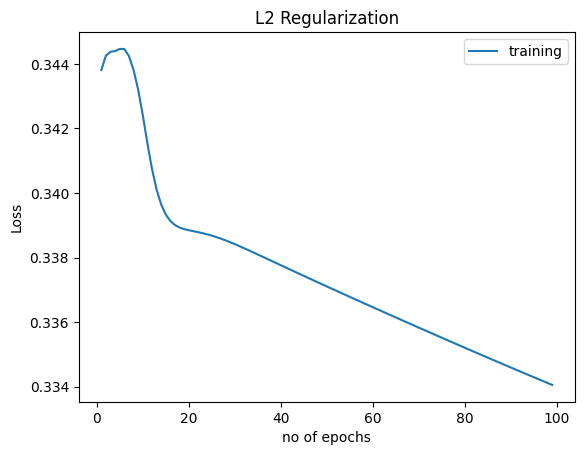

In [ ]:
import matplotlib.pyplot as plt

# Sample data
list1 = training_loss1[1:]

# Get the length of either list
n = len(list1)

# Create x-axis values
x = range(1, n+1)

# Plot the two lists on the same graph
plt.plot(x, list1, label='training')


# Add labels and legend
plt.xlabel('no of epochs')
plt.ylabel('Loss')
plt.title('L2 Regularization')
plt.legend()

# Show the graph
plt.show()

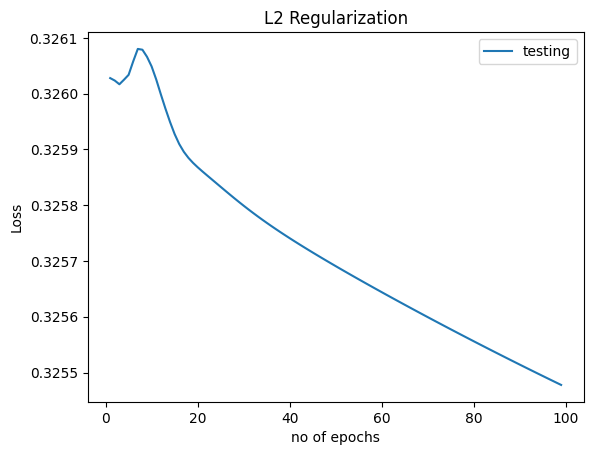

In [ ]:
list2 = testing_loss1[1:]
n = len(list2)
plt.plot(x, list2, label='testing')
# Add labels and legend
plt.xlabel('no of epochs')
plt.ylabel('Loss')
plt.title('L2 Regularization')
plt.legend()

# Show the graph
plt.show()

In [ ]:
# overfitting
# neural network
x_train2 = x_train[200:400,:,:]
y_train2 = y_train[200:400]
x_test2 = x_test[2000:4000,:,:]
y_test2 = y_test[2000:4000]

network2 = [
    Convolutional((1, 28, 28), 3, 5),
    Sigmoid(),
    Convolutional((5, 26, 26), 3, 5),
    Sigmoid(),
    Convolutional((5, 24, 24), 3, 5),
    Sigmoid(),
    Convolutional((1, 22, 22), 3, 5),
    Sigmoid(),
    Convolutional((5, 20, 20), 3, 5),
    Sigmoid(),
    Reshape((5, 18, 18), (5 * 18 * 18, 1)),
    Dense(5 * 18 * 18, 500),
    Sigmoid(),
    Dense(500, 100),
    Sigmoid(),
    Dense(100, 10),
    Sigmoid()
]

# train
training_loss2,testing_loss2= train(
    network2,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train2,
    y_train2,
    x_test2,
    y_test2,
    epochs=100,
    learning_rate=0.1,
    Lambda = 0.0
)

# test


1/100, training error=0.4283027842561538, testing error = 1.835092669099992
2/100, training error=0.35042293357887133, testing error = 0.3263689012677208
3/100, training error=0.35010350404362356, testing error = 0.3260015866592886
4/100, training error=0.34999017743710925, testing error = 0.3258520890594322
5/100, training error=0.3498799544590807, testing error = 0.3256936777327039
6/100, training error=0.34945098216171233, testing error = 0.32540066587561634
7/100, training error=0.3477240757575255, testing error = 0.32486136762035045
8/100, training error=0.34485530493747374, testing error = 0.32394194227441525
9/100, training error=0.34281326900415005, testing error = 0.32270583045203427
10/100, training error=0.3409426555700964, testing error = 0.32215956060673
11/100, training error=0.3369233647768388, testing error = 0.3182524192765046
12/100, training error=0.33632283730891993, testing error = 0.31581386189670996
13/100, training error=0.3344567708390993, testing error = 0.307

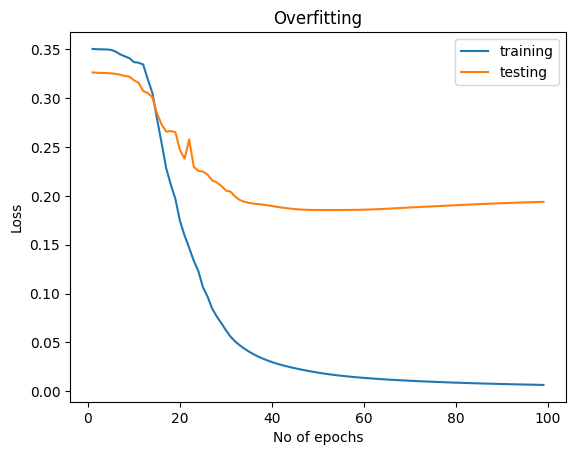

In [ ]:
import matplotlib.pyplot as plt

# Sample data
list1 = training_loss2[1:]
list2 = testing_loss2[1:]

# Get the length of either list
n = len(list1)

# Create x-axis values
x = range(1, n+1)

# Plot the two lists on the same graph
plt.plot(x, list1, label='training')
plt.plot(x, list2, label='testing')

# Add labels and legend
plt.xlabel('No of epochs')
plt.ylabel('Loss')
plt.title('Overfitting')
plt.legend()

# Show the graph
plt.show()

In [ ]:
# Earlystop
# neural network
x_train3 = x_train[:200,:,:]
y_train3 = y_train[:200]
x_test3 = x_test[:2000,:,:]
y_test3 = y_test[:2000]

network3 = [
    Convolutional((1, 28, 28), 3, 5),
    Sigmoid(),
    Reshape((5, 26, 26), (5 * 26 * 26, 1)),
    Dense(5 * 26 * 26, 100),
    Sigmoid(),
    Dense(100, 10),
    Sigmoid()
]

# train
training_loss3,testing_loss3, best_network = train_early_stop(
    network3,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train3,
    y_train3,
    x_test3,
    y_test3,
    delta = 0.0001,
    patience = 3,
    epochs=100,
    learning_rate=0.1,
    Lambda = 0.0
)

# test


1/100, training error=0.4340096149205128, testing error = 1.1282449423291059
2/100, training error=0.3386578419639728, testing error = 0.34106833924368274
3/100, training error=0.3325759089486442, testing error = 0.33709466921097403
4/100, training error=0.3192067832271102, testing error = 0.33987632824833514
5/100, training error=0.303901667939462, testing error = 0.3456980208205452
6/100, training error=0.29248960276116465, testing error = 0.33267591140313146
7/100, training error=0.28175249318753093, testing error = 0.32396829752312817
8/100, training error=0.2737106917079746, testing error = 0.32181956851182275
9/100, training error=0.26948284881626544, testing error = 0.3191102601429741
10/100, training error=0.259220890836669, testing error = 0.31346562753787044
11/100, training error=0.2463626338342533, testing error = 0.3165223673088546
12/100, training error=0.2327421154320392, testing error = 0.31267567598849705
13/100, training error=0.2201750104029929, testing error = 0.305

In [ ]:
target_length = 100
last_value1 = training_loss3[-1]
training_loss3 = training_loss3 + [last_value1] * (target_length - len(training_loss3))
last_value2 = training_loss3[-1]
testing_loss3 = testing_loss3 + [last_value2] * (target_length - len(testing_loss3))

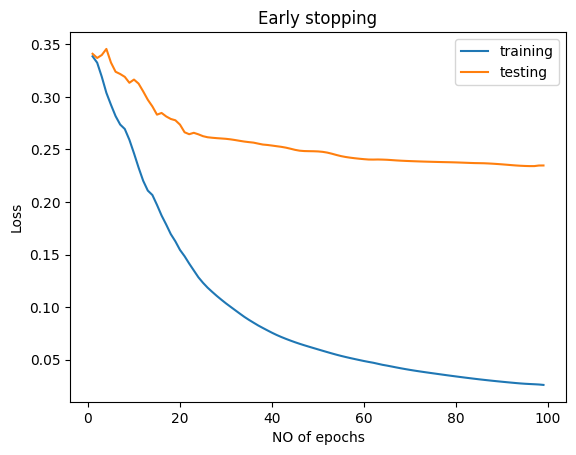

In [ ]:
import matplotlib.pyplot as plt

# Sample data
list1 = training_loss3[1:]
list2 = testing_loss3[1:]

# Get the length of either list
n = len(list1)

# Create x-axis values
x = range(1, n+1)

# Plot the two lists on the same graph
plt.plot(x, list1, label='training')
plt.plot(x, list2, label='testing')

# Add labels and legend
plt.xlabel('NO of epochs')
plt.ylabel('Loss')
plt.title('Early stopping')
plt.legend()

# Show the graph
plt.show()

In [ ]:
noise_scale = 0.001  # Scale of the random noise
x_train_noisy = x_train + noise_scale * np.random.rand(*x_train.shape)
x_test_noisy = x_test + noise_scale * np.random.rand(*x_test.shape)

In [ ]:
# Noise without regulization
# neural network
x_train4 = x_train_noisy[200:400,:,:]
y_train4 = y_train[200:400]
x_test4 = x_test_noisy[2000:4000,:,:]
y_test4 = y_test[2000:4000]

network4 = [
    Convolutional((1, 28, 28), 3, 5),
    Sigmoid(),
    Reshape((5, 26, 26), (5 * 26 * 26, 1)),
    Dense(5 * 26 * 26, 100),
    Sigmoid(),
    Dense(100, 10),
    Sigmoid()
]

# train
training_loss4,testing_loss4= train(
    network4,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train4,
    y_train4,
    x_test4,
    y_test4,
    epochs=100,
    learning_rate=0.1,
    Lambda = 0.0
)

# test


1/100, training error=0.4908609906797842, testing error = 1.354026049449759
2/100, training error=0.3399877825391372, testing error = 0.3488201932567468
3/100, training error=0.3246071579153637, testing error = 0.32899265172970704
4/100, training error=0.31641104336771386, testing error = 0.32252106755406007
5/100, training error=0.3063844100126815, testing error = 0.31463191650532907
6/100, training error=0.29451859172473577, testing error = 0.31090555075327697
7/100, training error=0.2864085265275173, testing error = 0.30662711583452373
8/100, training error=0.2794749853099472, testing error = 0.30228189014093026
9/100, training error=0.2707085398977585, testing error = 0.2979744574161085
10/100, training error=0.26131003191948066, testing error = 0.2952464788124886
11/100, training error=0.2537297766597379, testing error = 0.2882128160280927
12/100, training error=0.2482286741462672, testing error = 0.2851234750453663
13/100, training error=0.23977049353775393, testing error = 0.282

In [ ]:
# Overfit
# neural network
x_train5 = x_train_noisy[:200,:,:]
y_train5 = y_train[:200]
x_test5 = x_test_noisy[:2000,:,:]
y_test5 = y_test[:2000]

network5 = [
    Convolutional((1, 28, 28), 3, 5),
    Sigmoid(),
    Reshape((5, 26, 26), (5 * 26 * 26, 1)),
    Dense(5 * 26 * 26, 100),
    Sigmoid(),
    Dense(100, 10),
    Sigmoid()
]

# train
training_loss5,testing_loss5 = train(
    network5,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train5,
    y_train5,
    x_test5,
    y_test5,
    epochs=100,
    learning_rate=0.1,
    Lambda = 0.01
)

# test


1/100, training error=0.4648328368430429, testing error = 3.4102558699048156
2/100, training error=0.3506203267866656, testing error = 0.332077232892998
3/100, training error=0.3492934156843598, testing error = 0.3310277839291777
4/100, training error=0.34924466207864774, testing error = 0.32994291667929887
5/100, training error=0.3487520445232162, testing error = 0.3296720806251946
6/100, training error=0.348182184756055, testing error = 0.3294865601203438
7/100, training error=0.3476069261685839, testing error = 0.32931503492407743
8/100, training error=0.3470356209434724, testing error = 0.3291477983909601
9/100, training error=0.34647013318312814, testing error = 0.3289832785108584
10/100, training error=0.3459113318181785, testing error = 0.3288211811803804
11/100, training error=0.345359953875681, testing error = 0.32866144347030696
12/100, training error=0.3448167420353998, testing error = 0.3285040593912304
13/100, training error=0.3442824673714632, testing error = 0.3283490501

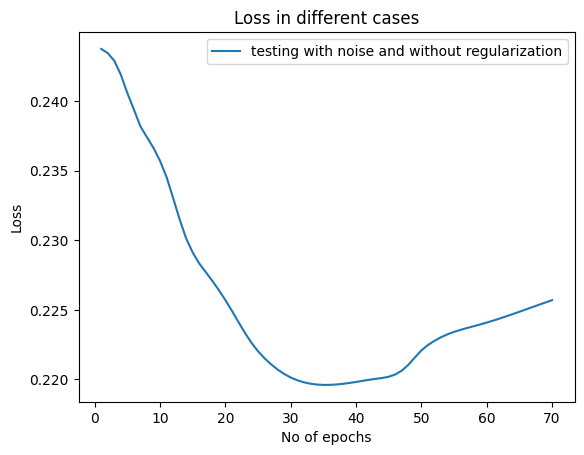

In [ ]:
list6 = testing_loss4[30:]

# Get the length of either list
n = len(list5)

# Create x-axis values
x = range(1, n+1)

plt.plot(x, list6, label='testing with noise and without regularization')

# Add labels and legend
plt.xlabel('No of epochs')
plt.ylabel('Loss')
plt.title('Loss in different cases')
plt.legend()

# Show the graph
plt.show()

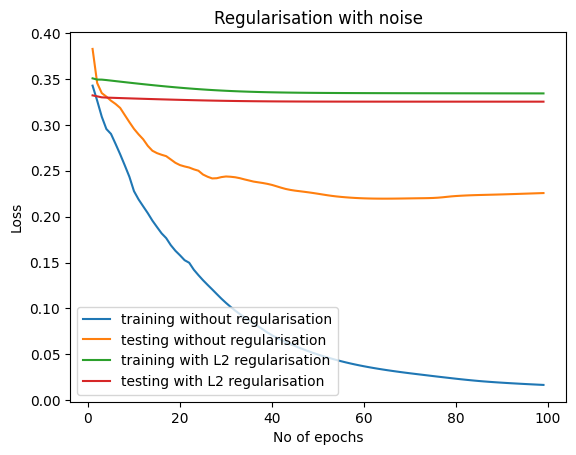

In [ ]:
import matplotlib.pyplot as plt

# Sample data
list1 = training_loss4[1:]
list2 = testing_loss4[1:]
list3 = training_loss5[1:]
list4 = testing_loss5[1:]

# Get the length of either list
n = len(list1)

# Create x-axis values
x = range(1, n+1)

# Plot the two lists on the same graph
plt.plot(x, list1, label='training without regularisation')
plt.plot(x, list2, label='testing without regularisation')
plt.plot(x, list3, label='training with L2 regularisation')
plt.plot(x, list4, label='testing with L2 regularisation')

# Add labels and legend
plt.xlabel('No of epochs')
plt.ylabel('Loss')
plt.title('Regularisation with noise')
plt.legend()

# Show the graph
plt.show()

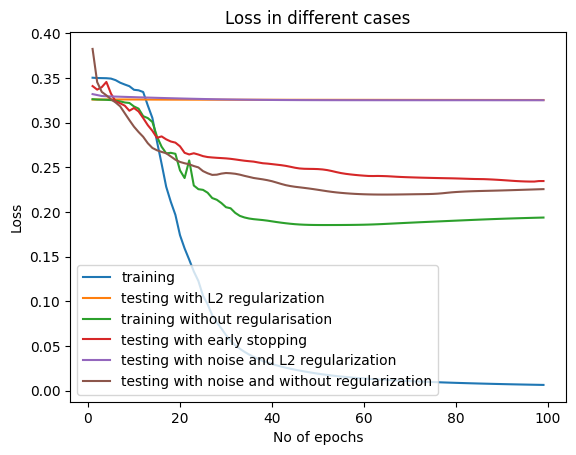

In [ ]:


# Sample data
list1 = training_loss2[1:]
list2 = testing_loss1[1:]
list3 = testing_loss2[1:]
list4 = testing_loss3[1:]
list5 = testing_loss5[1:]
list6 = testing_loss4[1:]

# Get the length of either list
n = len(list1)

# Create x-axis values
x = range(1, n+1)

# Plot the two lists on the same graph
plt.plot(x, list1, label='training')
plt.plot(x, list2, label='testing with L2 regularization')
plt.plot(x, list3, label='training without regularisation')
plt.plot(x, list4, label='testing with early stopping')
plt.plot(x, list5, label='testing with noise and L2 regularization')
plt.plot(x, list6, label='testing with noise and without regularization')

# Add labels and legend
plt.xlabel('No of epochs')
plt.ylabel('Loss')
plt.title('Loss in different cases')
plt.legend()

# Show the graph
plt.show()

# QUESTION 7

In [ ]:
import numpy as np
import math

## Preparing Dataset

In [ ]:
#below where the file is in gdrive, change with your
data_path = "/content/drive/MyDrive/Colab Notebooks/PRNN_A1/Prnn_datasets/"
dataset = np.loadtxt(data_path + 'PCA_MNIST.csv', delimiter=',',skiprows=1)

In [ ]:
dataset.shape

(60000, 11)

In [ ]:
# Normalising dataset needed to prevent exponent going to zero
for i in range(1,dataset.shape[1]):
  dataset[:,i] = (dataset[:,i]-dataset[:,i].min())/(dataset[:,i].max()-dataset[:,i].min())

In [ ]:
count = 40000
X_train = dataset[0:count,1:]
Y_train =dataset[0:count,0]
X_test = dataset[count:,1:]
Y_test = dataset[count:,0]

In [ ]:
classes = 10

## Creating Neural Network

In [ ]:
class neural_net:
  def __init__(self,input_size,neurons):
    #self.weights = 0.1 * np.ones((input_size,neurons))
    self.weights =  np.random.randn(input_size,neurons)
    self.biases = np.zeros((neurons,1))
  def forward(self,inputs):
    self.inputs = inputs
    self.output = self.weights.T@inputs + self.biases
  def backward(self,dvalues):
    self.dweights = self.inputs@dvalues.T  #gives a matrix
    self.dbiases =  dvalues

    self.dinputs = self.weights@dvalues

In [ ]:
class sigmoid_activation:
  def forward(self,input):
    self.inputs = input
    self.output = 1/(1+np.exp(-input))
  def backward(self,dvalues):
    self.dinputs = dvalues * self.output * (1-self.output)

In [ ]:
class relu_activation:
  def forward(self,input):
    self.inputs = input
    self.output = np.maximum(0,input)
    #self.output = np.minimum(self.output,1)
  def backward(self,dvalues):
    self.dinputs = dvalues * np.greater(self.inputs, 0).astype(int)
    #self.dinputs = self.dinputs * np.less(self.dinputs, 1).astype(int)

In [ ]:
class softmax_activation:
  def forward(self,input):
    self.input = input
    exp_values = np.exp(input)
    prob = exp_values/(np.sum(exp_values))
    self.output = prob
  def backward(self,dvalues):
    s =dvalues.shape[0]
    jac = np.zeros((s,s))
    for i in range(s):
      for j in range(s):
        k=0
        if i==j:
          k=1
        jac[i][j]= self.output[i][0]*(k-self.output[j][0])  #ddi/dnj
    self.dinputs = jac.T@dvalues

In [ ]:
class grad_des_optimizer:
  def __init__(self,alpha = 0.01):
    self.alpha = alpha
  def store_params(self,layer):
    if not hasattr(layer,'sgd_flag'):
      layer.sgd_flag = 1
      #print("Hi")
      layer.dweight_curr_itr_sum = np.zeros_like(layer.weights)
      layer.dbias_curr_itr_sum = np.zeros_like(layer.biases)

    layer.dweight_curr_itr_sum = layer.dweight_curr_itr_sum + layer.dweights
    layer.dbias_curr_itr_sum = layer.dbias_curr_itr_sum + layer.dbiases
  def update(self,layer,batch_size):
    layer.weights = layer.weights -  self.alpha * layer.dweight_curr_itr_sum/batch_size
    layer.biases = layer.biases -  self.alpha * layer.dbias_curr_itr_sum/batch_size

    layer.dweight_curr_itr_sum = np.zeros_like(layer.weights)
    layer.dbias_curr_itr_sum = np.zeros_like(layer.biases)

In [ ]:
class adam_optimizer:
  def __init__(self,alpha = 0.01,beta_1=0.9,beta_2=0.9):
    self.alpha = alpha
    self.beta_1 = beta_1
    self.beta_2 = beta_2
  def store_params(self,layer):
    if not hasattr(layer,'adam_flag'):
      layer.adam_flag=1
      layer.dweight_sum = np.zeros_like(layer.weights)
      layer.dbias_sum = np.zeros_like(layer.biases)
      layer.dweight_sq_sum = np.zeros_like(layer.weights)
      layer.dbias_sq_sum = np.zeros_like(layer.biases)

      layer.dweight_curr_itr_sum = np.zeros_like(layer.weights)
      layer.dbias_curr_itr_sum = np.zeros_like(layer.biases)

    layer.dweight_sum = self.beta_1*layer.dweight_sum+(1-self.beta_1)*layer.dweights
    layer.dbias_sum =  self.beta_1*layer.dbias_sum+(1-self.beta_1)*layer.dbiases
    layer.dweight_sq_sum = self.beta_2*layer.dweight_sq_sum+(1-self.beta_2)*layer.dweights**2
    layer.dbias_sq_sum =  self.beta_2*layer.dbias_sq_sum+(1-self.beta_2)*layer.dbiases**2
    layer.dweight_curr_itr_sum = layer.dweight_curr_itr_sum + layer.dweights
    layer.dbias_sq_sum = layer.dbias_sq_sum + layer.dbiases
  def update(self,layer,batch_size):
    layer.weights = layer.weights -  self.alpha* layer.dweight_curr_itr_sum/batch_size
    layer.biases = layer.biases -  self.alpha * layer.dbias_curr_itr_sum/batch_size

    layer.dweight_curr_itr_sum = np.zeros_like(layer.weights)
    layer.dbias_curr_itr_sum = np.zeros_like(layer.biases)

### Squared error loss

#### Model 1 with vanilla sgd optimizer

In [ ]:
sgd_opt = grad_des_optimizer(0.1) # This constant step size is choosen by trial and error

In [ ]:
# creating 3 layer neural net
layer1 = neural_net(10,50)
act1 = sigmoid_activation()
layer2 = neural_net(50,25)
act2 = sigmoid_activation()
layer3 = neural_net(25,10)

In [ ]:
#Training
nb = 1  #batch size
for epochs in range(20):
  loss = 0
  for i in range(X_train.shape[0]):

    x=X_train[i,:]
    y = Y_train[i]
    x = x.reshape((x.shape[0],1))
    yl = np.zeros((classes,1))          # y is label
    yl[int(y)][0]=1

    layer1.forward(x)    # x is feature vector
    act1.forward(layer1.output)
    layer2.forward(act1.output)
    act2.forward(layer2.output)
    layer3.forward(act2.output)
    pred = layer3.output
    
    loss = loss+np.linalg.norm(pred-yl)
    dinput_l = (pred-yl)     # Check the sign here else will diverge

    layer3.backward(dinput_l)
    sgd_opt.store_params(layer3)

    act2.backward(layer3.dinputs)

    layer2.backward(act2.dinputs)
    sgd_opt.store_params(layer2)

    act1.backward(layer2.dinputs)

    layer1.backward(act1.dinputs)
    sgd_opt.store_params(layer1)

    if(i%nb==0):
      sgd_opt.update(layer3,nb)
      sgd_opt.update(layer2,nb)
      sgd_opt.update(layer1,nb)

  print(loss)

  # opt.update(layer3,2)
  # opt.update(layer2,2)
  # opt.update(layer1,2)

26657.995437166643
17703.534110992656
15607.09291270791
14736.5182033949
14161.810043388168
13725.931355717488
13352.277012165227
13005.917016228552
12694.525957682898
12413.445660992265
12152.811609652583
11908.869265984224
11680.335905150952
11466.578239833128
11266.897689324482
11080.427743145998
10906.256290861293
10743.43237216621
10590.977646823405
10447.940601029424


In [ ]:
#Testing
conf_matrix = np.zeros((classes,classes))
loss = 0
count = 0
for i in range(X_test.shape[0]):
  x = X_test[i,:]
  y = Y_test[i]
  x = x.reshape((x.shape[0],1))
  yl = np.zeros((classes,1))          # y is label
  yl[int(y)][0]=1

  layer1.forward(x)    # x is feature vector
  act1.forward(layer1.output)
  layer2.forward(act1.output)
  act2.forward(layer2.output)
  layer3.forward(act2.output)
  pred = layer3.output

  loss = loss+np.linalg.norm(pred-yl)
  if np.argmax(pred)==int(y):
    count+=1
  k = np.argmax(pred)
  v = int(y)
  conf_matrix[v][k] += 1
print(loss)
print(count * 100 /X_test.shape[0])


5670.838679761603
94.27


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.9473420260782347, 0.9497064079652795, 0.9863429438543247, 0.9448169159360496, 0.9710754017305315, 0.9539706626201315, 0.8625987708516243, 0.8971413304835694, 0.9629446640316206, 0.9599183048251213]


#### Model 2 with adam optimizer

In [ ]:
adam_opt = adam_optimizer()

In [ ]:
# creating 3 layer neural net
layer1 = neural_net(10,80)
act1 = sigmoid_activation()
layer2 = neural_net(80,50)
act2 = sigmoid_activation()
layer3 = neural_net(50,25)
act3 = sigmoid_activation()
layer4 = neural_net(25,10)

In [ ]:
#Training
nb = 1  #batch size
for epochs in range(20):
  loss = 0
  for i in range(X_train.shape[0]):

    x=X_train[i,:]
    y = Y_train[i]
    x = x.reshape((x.shape[0],1))
    yl = np.zeros((classes,1))          # y is label
    yl[int(y)][0]=1

    layer1.forward(x)    # x is feature vector
    act1.forward(layer1.output)
    layer2.forward(act1.output)
    act2.forward(layer2.output)
    layer3.forward(act2.output)
    act3.forward(layer3.output)
    layer4.forward(act3.output)
    pred = layer4.output

    
    loss = loss+np.linalg.norm(pred-yl)
    dinput_l = (pred-yl)     # Check the sign here else will diverge

    layer4.backward(dinput_l)
    adam_opt.store_params(layer4)

    act3.backward(layer4.dinputs)

    layer3.backward(act3.dinputs)
    adam_opt.store_params(layer3)

    act2.backward(layer3.dinputs)

    layer2.backward(act2.dinputs)
    adam_opt.store_params(layer2)

    act1.backward(layer2.dinputs)

    layer1.backward(act1.dinputs)
    adam_opt.store_params(layer1)

    if(i%nb==0):
      adam_opt.update(layer4,nb)
      adam_opt.update(layer3,nb)
      adam_opt.update(layer2,nb)
      adam_opt.update(layer1,nb)

  print(loss)

  # opt.update(layer3,2)
  # opt.update(layer2,2)
  # opt.update(layer1,2)

30032.33858263664
23859.040647178776
21475.344796166763
19719.36666331349
18584.415870589266
17789.742169341593
17169.123477332516
16654.237082272848
16210.66917089177
15818.65028327164
15463.7182151292
15135.311448220396
14826.641882860102
14533.234880257944
14252.092200992174
13981.675988801253
13722.420996026973
13476.531828724083
13246.389524351765
13032.754005866713


In [ ]:
#Testing
conf_matrix = np.zeros((classes,classes))
loss = 0
count = 0
for i in range(X_test.shape[0]):
  x = X_test[i,:]
  y = Y_test[i]
  x = x.reshape((x.shape[0],1))
  yl = np.zeros((classes,1))          # y is label
  yl[int(y)][0]=1

  layer1.forward(x)    # x is feature vector
  act1.forward(layer1.output)
  layer2.forward(act1.output)
  act2.forward(layer2.output)
  layer3.forward(act2.output)
  act3.forward(layer3.output)
  layer4.forward(act3.output)
  pred = layer4.output

  loss = loss+np.linalg.norm(pred-yl)
  if np.argmax(pred)==int(y):
    count+=1
  k = np.argmax(pred)
  v = int(y)
  conf_matrix[v][k] += 1
print(loss)
print(count * 100 /X_test.shape[0])


6347.709965141891
93.875


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.9369234604836699, 0.9531806615776082, 0.9648497198166073, 0.9323573952549218, 0.9693524468610973, 0.9358974358974359, 0.8903488898957861, 0.8948202959830867, 0.9597447226313206, 0.9526941563369593]


#### Model 3 (5 layers and adam)

In [ ]:
adam_opt = adam_optimizer() # This constant step size is choosen by trial and error

In [ ]:
# creating 3 layer neural net
layer1 = neural_net(10,100)
act1 = sigmoid_activation()
layer2 = neural_net(100,80)
act2 = sigmoid_activation()
layer3 = neural_net(80,40)
act3 = sigmoid_activation()
layer4 = neural_net(40,20)
act4 = sigmoid_activation()
layer5 = neural_net(20,10)


In [ ]:
#Training
nb = 1  #batch size
for epochs in range(20):
  loss = 0
  for i in range(X_train.shape[0]):

    x=X_train[i,:]
    y = Y_train[i]
    x = x.reshape((x.shape[0],1))
    yl = np.zeros((classes,1))          # y is label
    yl[int(y)][0]=1

    layer1.forward(x)    # x is feature vector
    act1.forward(layer1.output)
    layer2.forward(act1.output)
    act2.forward(layer2.output)
    layer3.forward(act2.output)
    act3.forward(layer3.output)
    layer4.forward(act3.output)
    act4.forward(layer4.output)
    layer5.forward(act4.output)
    pred = layer5.output

    
    loss = loss+np.linalg.norm(pred-yl)
    dinput_l = (pred-yl)     # Check the sign here else will diverge

    layer5.backward(dinput_l)
    adam_opt.store_params(layer5)

    act4.backward(layer5.dinputs)

    layer4.backward(act4.dinputs)
    adam_opt.store_params(layer4)

    act3.backward(layer4.dinputs)

    layer3.backward(act3.dinputs)
    adam_opt.store_params(layer3)

    act2.backward(layer3.dinputs)

    layer2.backward(act2.dinputs)
    adam_opt.store_params(layer2)

    act1.backward(layer2.dinputs)

    layer1.backward(act1.dinputs)
    adam_opt.store_params(layer1)

    if(i%nb==0):
      adam_opt.update(layer5,nb)
      adam_opt.update(layer4,nb)
      adam_opt.update(layer3,nb)
      adam_opt.update(layer2,nb)
      adam_opt.update(layer1,nb)

  print(loss)

  # opt.update(layer3,2)
  # opt.update(layer2,2)
  # opt.update(layer1,2)

30417.69966919783
22978.801383975464
19367.774455415496
17449.805655837004
16298.823891270173
15472.007371179434
14823.10452706601
14288.429675774036
13832.026738689963
13433.946524211633
13084.220930348714
12773.307536639191
12493.905137227524
12239.745503710343
12006.426566146893
11790.720910859924
11589.79440039694
11401.103711556838
11222.674589026075
11053.280539302143


In [ ]:
#Testing
conf_matrix = np.zeros((classes,classes))
loss = 0
count = 0
for i in range(X_test.shape[0]):
  x = X_test[i,:]
  y = Y_test[i]
  x = x.reshape((x.shape[0],1))
  yl = np.zeros((classes,1))          # y is label
  yl[int(y)][0]=1

  layer1.forward(x)    # x is feature vector
  act1.forward(layer1.output)
  layer2.forward(act1.output)
  act2.forward(layer2.output)
  layer3.forward(act2.output)
  act3.forward(layer3.output)
  layer4.forward(act3.output)
  act4.forward(layer4.output)
  layer5.forward(act4.output)
  pred = layer5.output

  loss = loss+np.linalg.norm(pred-yl)
  if np.argmax(pred)==int(y):
    count+=1
  k = np.argmax(pred)
  v = int(y)
  conf_matrix[v][k] += 1
print(loss)
print(count * 100 /X_test.shape[0])


6213.082930402086
90.925


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.9326038298930615, 0.946611909650924, 0.9381039435884043, 0.8917678812415655, 0.9586656997824511, 0.9065905552672548, 0.8051685846961437, 0.8028912983041423, 0.9600591715976331, 0.9630566801619433]


### Cross Entropy loss

#### Model 1 with vanilla sgd optimizer

In [ ]:
sgd_opt = grad_des_optimizer()

In [ ]:
# creating 3 layer neural net
layer1 = neural_net(10,50)
act1 = sigmoid_activation()
layer2 = neural_net(50,25)
act2 = sigmoid_activation()
layer3 = neural_net(25,10)
softmax = softmax_activation()

In [ ]:
#Training
nb = 1  #batch size
for epochs in range(20):
  loss = 0
  for i in range(X_train.shape[0]):

    x=X_train[i,:]
    y = Y_train[i]
    x = x.reshape((x.shape[0],1))
    yl = np.zeros((classes,1))          # y is label
    yl[int(y)][0]=1

    layer1.forward(x)    # x is feature vector
    act1.forward(layer1.output)
    layer2.forward(act1.output)
    act2.forward(layer2.output)
    layer3.forward(act2.output)
    softmax.forward(layer3.output)
    pred = softmax.output
    
    loss = loss-math.log(pred[int(y)])
    dinput_l = -yl * 1/pred     # take loss derivative wrt pred

    softmax.backward(dinput_l)

    layer3.backward(softmax.dinputs)
    sgd_opt.store_params(layer3)

    act2.backward(layer3.dinputs)

    layer2.backward(act2.dinputs)
    sgd_opt.store_params(layer2)

    act1.backward(layer2.dinputs)

    layer1.backward(act1.dinputs)
    sgd_opt.store_params(layer1)

    if(i%nb==0):
      sgd_opt.update(layer3,nb)
      sgd_opt.update(layer2,nb)
      sgd_opt.update(layer1,nb)

  print(loss)

  # opt.update(layer3,2)
  # opt.update(layer2,2)
  # opt.update(layer1,2)

33128.22863085763
13735.510395174892
12228.973053772459
11570.49506367591
11101.303364488767
10700.792031906845
10340.334950647752
10010.303001567034
9702.188143509413
9414.067248497058
9145.204523343944
8894.601196629774
8662.08425724792
8447.509174096285
8250.33394784254
8069.789862379179
7904.663532235477
7753.3125352564
7614.028313416213
7485.250609885848


In [ ]:
#Testing
conf_matrix = np.zeros((classes,classes))
loss = 0
count = 0
for i in range(X_test.shape[0]):
  x = X_test[i,:]
  y = Y_test[i]
  x = x.reshape((x.shape[0],1))
  yl = np.zeros((classes,1))          # y is label
  yl[int(y)][0]=1

  layer1.forward(x)    # x is feature vector
  act1.forward(layer1.output)
  layer2.forward(act1.output)
  act2.forward(layer2.output)
  layer3.forward(act2.output)
  softmax.forward(layer3.output)
  pred = softmax.output

  loss = loss-math.log(pred[int(y)])
  if np.argmax(pred)==int(y):
    count+=1
  k = np.argmax(pred)
  v = int(y)
  conf_matrix[v][k] += 1
print(loss)
print(count * 100 /X_test.shape[0])


4347.849756711573
92.845


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.9171244327680917, 0.9209621993127147, 0.961348897535668, 0.9359556227937469, 0.9610705596107056, 0.9254201680672269, 0.85801393728223, 0.8782585326525127, 0.9731896767727387, 0.9606220215701028]


#### Model 2 with adam optimizer

In [ ]:
adam_opt = adam_optimizer()

In [ ]:
# creating 3 layer neural net
layer1 = neural_net(10,60)
act1 = sigmoid_activation()
layer2 = neural_net(60,10)
softmax = softmax_activation()

In [ ]:
#Training
nb = 1  #batch size
for epochs in range(20):
  loss = 0
  for i in range(X_train.shape[0]):

    x=X_train[i,:]
    y = Y_train[i]
    x = x.reshape((x.shape[0],1))
    yl = np.zeros((classes,1))          # y is label
    yl[int(y)][0]=1

    layer1.forward(x)    # x is feature vector
    act1.forward(layer1.output)
    layer2.forward(act1.output)
    softmax.forward(layer2.output)
    pred = softmax.output
    
    loss = loss-math.log(pred[int(y)])
    dinput_l = -yl * 1/pred     # take loss derivative wrt pred

    softmax.backward(dinput_l)

    layer2.backward(softmax.dinputs)
    adam_opt.store_params(layer2)

    act1.backward(layer2.dinputs)

    layer1.backward(act1.dinputs)
    adam_opt.store_params(layer1)

    if(i%nb==0):
      adam_opt.update(layer2,nb)
      adam_opt.update(layer1,nb)

  print(loss)

  # opt.update(layer3,2)
  # opt.update(layer2,2)
  # opt.update(layer1,2)

30250.847966570618
16670.537613693006
14794.823898795605
13928.901850490392
13402.04578240597
13027.42718715633
12731.131094086935
12478.24113357203
12250.765154681572
12039.276604732186
11839.075699353376
11648.105710693239
11465.690297697203
11291.740590040987
11126.28166702413
10969.213480502558
10820.236457056211
10678.877115174564
10544.558023080795
10416.671345826308


In [ ]:
#Testing
conf_matrix = np.zeros((classes,classes))
loss = 0
count = 0
for i in range(X_test.shape[0]):
  x = X_test[i,:]
  y = Y_test[i]
  x = x.reshape((x.shape[0],1))
  yl = np.zeros((classes,1))          # y is label
  yl[int(y)][0]=1

  layer1.forward(x)    # x is feature vector
  act1.forward(layer1.output)
  layer2.forward(act1.output)
  softmax.forward(layer2.output)
  pred = softmax.output

  loss = loss-math.log(pred[int(y)])
  if np.argmax(pred)==int(y):
    count+=1
  k = np.argmax(pred)
  v = int(y)
  conf_matrix[v][k] += 1
print(loss)
print(count * 100 /X_test.shape[0])


4334.230897710366
92.765


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.9163479923518164, 0.9277389277389277, 0.9475308641975309, 0.9335708831763807, 0.9618654359970853, 0.9260759493670886, 0.8939530685920578, 0.8621348621348621, 0.9578090303478904, 0.9477440734132042]


#### Model 3 ( 4 layers and adam) 

In [ ]:
adam_opt = adam_optimizer()

In [ ]:
# creating 3 layer neural net
layer1 = neural_net(10,100)
act1 = sigmoid_activation()
layer2 = neural_net(100,50)
act2 = sigmoid_activation()
layer3 = neural_net(50,25)
act3 = sigmoid_activation()
layer4 = neural_net(25,10)
softmax = softmax_activation()

In [ ]:
#Training
nb = 1  #batch size
for epochs in range(20):
  loss = 0
  for i in range(X_train.shape[0]):

    x=X_train[i,:]
    y = Y_train[i]
    x = x.reshape((x.shape[0],1))
    yl = np.zeros((classes,1))          # y is label
    yl[int(y)][0]=1

    layer1.forward(x)    # x is feature vector
    act1.forward(layer1.output)
    layer2.forward(act1.output)
    act2.forward(layer2.output)
    layer3.forward(act2.output)
    act3.forward(layer3.output)
    layer4.forward(act3.output)
    softmax.forward(layer4.output)
    pred = softmax.output
    
    loss = loss-math.log(pred[int(y)])
    dinput_l = -yl * 1/pred     # take loss derivative wrt pred

    softmax.backward(dinput_l)

    layer4.backward(softmax.dinputs)
    adam_opt.store_params(layer4)

    act3.backward(layer4.dinputs)

    layer3.backward(act3.dinputs)
    adam_opt.store_params(layer3)

    act2.backward(layer3.dinputs)

    layer2.backward(act2.dinputs)
    adam_opt.store_params(layer2)

    act1.backward(layer2.dinputs)

    layer1.backward(act1.dinputs)
    adam_opt.store_params(layer1)

    if(i%nb==0):
      adam_opt.update(layer4,nb)
      adam_opt.update(layer3,nb)
      adam_opt.update(layer2,nb)
      adam_opt.update(layer1,nb)

  print(loss)

  # opt.update(layer3,2)
  # opt.update(layer2,2)
  # opt.update(layer1,2)

21608.567572315333
11827.475733223278
10577.70286318547
9831.648889813876
9263.203972381652
8776.55341639035
8358.695721890968
8010.561548073992
7724.114549058041
7475.1809057704895
7254.64943990544
7059.10468653111
6885.360955803202
6730.51287261685
6590.963059777373
6463.014234422001
6343.762168129844
6231.496516172533
6125.212205133743
6024.206589519495


In [ ]:
#Testing
conf_matrix = np.zeros((classes,classes))
loss = 0
count = 0
for i in range(X_test.shape[0]):
  x = X_test[i,:]
  y = Y_test[i]
  x = x.reshape((x.shape[0],1))
  yl = np.zeros((classes,1))          # y is label
  yl[int(y)][0]=1

  layer1.forward(x)    # x is feature vector
  act1.forward(layer1.output)
  layer2.forward(act1.output)
  act2.forward(layer2.output)
  layer3.forward(act2.output)
  act3.forward(layer3.output)
  layer4.forward(act3.output)
  softmax.forward(layer4.output)
  pred = softmax.output

  loss = loss-math.log(pred[int(y)])
  if np.argmax(pred)==int(y):
    count+=1
  k = np.argmax(pred)
  v = int(y)
  conf_matrix[v][k] += 1
print(loss)
print(count * 100 /X_test.shape[0])


3556.6060992294215
94.045


In [ ]:
# Storing True positive True negative, False Positive, False negative and F values in a list scores
TP=[]
TN=[]
FP=[]
FN=[]
F1=[]
for i in range(classes):
  TP.append(conf_matrix[i][i])
  TN.append(np.sum(conf_matrix)-np.sum(conf_matrix[i,:])-np.sum(conf_matrix[:,i])+conf_matrix[i][i])
  FP.append(np.sum(conf_matrix[i,:])-conf_matrix[i][i])
  FN.append(np.sum(conf_matrix[:,i])-conf_matrix[i][i])
  F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
print('F1 scores for corresponding classes are:')
print(F1)

F1 scores for corresponding classes are:
[0.9140698772426817, 0.923320994182972, 0.9678910865656306, 0.9445420326223337, 0.9666666666666667, 0.9470954356846473, 0.8953623863901189, 0.9083440308087292, 0.974320241691843, 0.9665835411471322]
